# WEB SCRAPING PROJECT - Television analysis (Part - 2)


### Problem Statement
- Best highend Televisions based on the Criteria.
- Criteria : Screen size >= 65.5, Resolution == 'Ultra HD (4K)' or '(8K)', Ratings >= 4.0, Screen type == 'OLED' or 'QLED'

### Step - 4
- Import and read the converted Dataframe.
- Do the required Adjustments.
- Detecting Outliers. 
- Deep cleaning of the Data.
- Keeping and Droping the Columns and Rows as per requirement.
- Replacing and Removing the NaN Values from the data.
- Thus creating the Perfect Data file.

In [1]:
# Import all the required Libraries.

import requests  # Requests allows you to send HTTP/1.1 requests extremely easily.
from bs4 import BeautifulSoup as BS  #  It easy to scrape information from web pages.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=False

# If errors arive then try re-installing and re-importing the libraries again. 

In [2]:
# read the saved csv file through pandas.

TV=pd.read_csv('tvs.csv')
TV

# hence the csv file saved to a variable

,Product_name,Pricing,Features,Ratings,Brand,Operating_System,Smart_tv,Screen_size,Screen_type,Resolution
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹13,999",Operating System: AndroidHD Ready 1366 x 768 P...,4.4,Mi,Android,Smart Android TV,32 inch,LED,HD Ready
1,Mi X Series 108 cm (43 inch) Ultra HD (4K) LED...,"₹28,999",Operating System: AndroidUltra HD (4K) 3840 x ...,4.3,Mi,Android,Smart Android TV,43 inch,LED,Ultra HD (4K)
2,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹8,199",Operating System: LinuxHD Ready 1366 x 768 Pix...,4.2,Infinix,Linux,Smart Linux TV,32 inch,LED,HD Ready
3,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,"₹13,990",Operating System: WebOSHD Ready 1366 x 768 Pix...,4.4,LG,Web,Smart WebOS TV,32 inch,LED,HD Ready
4,realme 80 cm (32 inch) HD Ready LED Smart Andr...,"₹11,999",Operating System: AndroidHD Ready 1366 x 768 P...,4.3,realme,Android,Smart Android TV,32 inch,LED,HD Ready
...,...,...,...,...,...,...,...,...,...,...
979,DETEL 108 cm (43 inch) Full HD LED Smart Andro...,"₹23,147",Operating System: AndroidFull HD 1920 x 1080 P...,4.1,DETEL,Android,Smart Android TV,43 inch,LED,Full HD
980,TOSHIBA C350MP 139 cm (55 inch) Ultra HD (4K) ...,"₹36,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,TOSHIBA,Google TV,Smart Google TV,55 inch,LED,Ultra HD (4K)
981,TOSHIBA C350MP 108 cm (43 inch) Ultra HD (4K) ...,"₹27,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,TOSHIBA,Google TV,Smart Google TV,43 inch,LED,Ultra HD (4K)
982,DETEL 140 cm (55 inch) Ultra HD (4K) LED Smart...,"₹34,671",Operating System: AndroidUltra HD (4K) 3840 x ...,4.1,DETEL,Android,Smart Android TV,55 inch,LED,Ultra HD (4K)


In [3]:
# to rearrange the order of columns.

TV=TV[['Brand','Product_name','Screen_size','Screen_type','Resolution','Operating_System','Smart_tv','Features','Ratings','Pricing']]
TV   

# columns rearranged in the output and saved to a variable.

,Brand,Product_name,Screen_size,Screen_type,Resolution,Operating_System,Smart_tv,Features,Ratings,Pricing
0,Mi,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,32 inch,LED,HD Ready,Android,Smart Android TV,Operating System: AndroidHD Ready 1366 x 768 P...,4.4,"₹13,999"
1,Mi,Mi X Series 108 cm (43 inch) Ultra HD (4K) LED...,43 inch,LED,Ultra HD (4K),Android,Smart Android TV,Operating System: AndroidUltra HD (4K) 3840 x ...,4.3,"₹28,999"
2,Infinix,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,32 inch,LED,HD Ready,Linux,Smart Linux TV,Operating System: LinuxHD Ready 1366 x 768 Pix...,4.2,"₹8,199"
3,LG,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,32 inch,LED,HD Ready,Web,Smart WebOS TV,Operating System: WebOSHD Ready 1366 x 768 Pix...,4.4,"₹13,990"
4,realme,realme 80 cm (32 inch) HD Ready LED Smart Andr...,32 inch,LED,HD Ready,Android,Smart Android TV,Operating System: AndroidHD Ready 1366 x 768 P...,4.3,"₹11,999"
...,...,...,...,...,...,...,...,...,...,...
979,DETEL,DETEL 108 cm (43 inch) Full HD LED Smart Andro...,43 inch,LED,Full HD,Android,Smart Android TV,Operating System: AndroidFull HD 1920 x 1080 P...,4.1,"₹23,147"
980,TOSHIBA,TOSHIBA C350MP 139 cm (55 inch) Ultra HD (4K) ...,55 inch,LED,Ultra HD (4K),Google TV,Smart Google TV,Operating System: Google TVUltra HD (4K) 3840 ...,4.3,"₹36,999"
981,TOSHIBA,TOSHIBA C350MP 108 cm (43 inch) Ultra HD (4K) ...,43 inch,LED,Ultra HD (4K),Google TV,Smart Google TV,Operating System: Google TVUltra HD (4K) 3840 ...,4.3,"₹27,999"
982,DETEL,DETEL 140 cm (55 inch) Ultra HD (4K) LED Smart...,55 inch,LED,Ultra HD (4K),Android,Smart Android TV,Operating System: AndroidUltra HD (4K) 3840 x ...,4.1,"₹34,671"


In [4]:
# finding the unique values of brand column and converting all the values as str() Datatype.

TV['Brand']=TV['Brand'].str.upper()
TV['Brand'].unique()

# detecting the NaN's and Uniques.

array(['MI', 'INFINIX', 'LG', 'REALME', 'SAMSUNG', 'THOMSON', 'ONEPLUS',
       'SENS', 'IFFALCON', 'COOCAA', 'ACER', 'SANSUI', 'BEETHOSOL',
       'MOTOROLA', 'TCL', 'VU', 'TOSHIBA', 'KODAK', 'SONY', 'MARQ',
       'NOKIA', 'COMPAQ', 'DYANORA', 'ONIDA', 'BLAUPUNKT', 'HYUNDAI',
       'CANDY', 'HISENSE', 'ADSUN', 'PANASONIC', 'SKYTRON', 'MICROMAX',
       'LLOYD', 'PHILIPS', 'GANGNAM', 'QVA', 'AKAI', 'CANDES', 'KEVIN',
       'LEEMA', 'XELECTRON', 'XIAOMI', 'VG', 'ITEL', 'CELLECOR', 'JVC',
       'RIDAEX', 'IMPEX', 'POWER', 'IMEE', 'BPL', 'DOTONE', 'SALORA',
       'WYBOR', 'CORNEA', 'HAIER', 'INNOQ', 'SNS', 'AIWA', 'NDGO', 'IVEE',
       'FELTRON', nan, 'REALMERCURY', 'DACS', 'INVANTER', 'HUIDI',
       'DETEL'], dtype=object)

In [5]:
# finding all the unique values of Screen_size column.

TV['Screen_size'].unique()

# they are in object datatype.

array(['32 inch', '43 inch', '32 Inch', nan, '50 inch', '40 inch',
       '24 inch', '55 inch', '65 inch', '50 Inch', '75 inch', '39 inch',
       '70 inch', '42 inch', '55 Inch', '43 Inch', '49 inch', '60 inch',
       '48 inch', '58 inch', '86 inch'], dtype=object)

In [6]:
# removing the alpha types from the column..

TV['Screen_size']=TV['Screen_size'].apply(lambda x: re.sub(r'\sInch|\sinch','',str(x)))
TV['Screen_size']=TV['Screen_size'].str.strip()
TV['Screen_size']=TV['Screen_size'].replace('nan',np.NaN)
TV['Screen_size'].unique()

# removing exces space and converting the 'nan' to NaN. 

array(['32', '43', nan, '50', '40', '24', '55', '65', '75', '39', '70',
       '42', '49', '60', '48', '58', '86'], dtype=object)

In [7]:
# doing same as above

TV['Ratings']=TV['Ratings'].apply(lambda x: re.sub(r'\d\.(\s)','0',str(x)))
TV['Ratings']=TV['Ratings'].apply(lambda x: float(x))
TV['Ratings'].unique()

# converting to float values

array([4.4, 4.3, 4.2, nan, 4.1, 4. , 4.6, 4.7, 4.5, 3.9, 4.8, 5. , 3.6,
       3.8, 3.7, 4.9, 3.3, 3. , 3.4, 2.7])

In [8]:
# to view and edit all the unique values.

TV['Screen_type'].unique()

# we got some values that are combined.

array(['LED', 'QLED', 'LCD', 'OLED', 'QLEDQLED', 'OLEDOLED', 'LEDLED',
       'QLEDLED', nan], dtype=object)

In [9]:
# editing all the incorect values of Screen_type column.

pattern0=r'QLEDQLED'
pattern1=r'OLEDOLED'
pattern2=r'LEDLED'
pattern3=r'QLEDLED'
TV['Screen_type'] = TV['Screen_type'].replace(pattern0, 'QLED').replace(pattern1, 'OLED').replace(pattern2, 'LED').replace(pattern3, 'QLED')
TV['Screen_type'].unique()

# and displaying the unique values.

array(['LED', 'QLED', 'LCD', 'OLED', nan], dtype=object)

In [10]:
# same as above.

TV['Resolution'].unique()

# dspalying all the unique values.

array(['HD Ready', 'Ultra HD (4K)', 'Full HD', nan], dtype=object)

In [11]:
# using regex, filtering and selction of the specifics is done.

regex_pattern=r'\s(\d+\sx\s\d+)'
TV['Pixels']=TV['Features'].apply(lambda x: re.findall(regex_pattern,x))

TV['Pixels']=TV['Pixels'].apply(lambda x: ''.join(x))

# removing execes spaces.

In [12]:
# re-name and type casting.

TV.rename(columns={'Screen_size':'ScreenSize(inch)'}, inplace=True)
TV['ScreenSize(inch)']=TV['ScreenSize(inch)'].astype(float)
TV['ScreenSize(inch)'].unique()

# displaying the unique values.

array([32., 43., nan, 50., 40., 24., 55., 65., 75., 39., 70., 42., 49.,
       60., 48., 58., 86.])

In [13]:
# using regex, filtering and selction of the specifics is done.

#TV['Smart_tv']=TV['Smart_tv'].apply(lambda x: x.replace(r'Smart\s\w+\sTV', 'yes'))
TV['Smart_tv']=TV['Smart_tv'].str.replace(r'Smart\s\w+\sTV', 'yes').replace(np.nan, 'no')
TV['Smart_tv'].unique()

# replacing and displaying unique values.

array(['yes', 'no'], dtype=object)

In [14]:
# using regex, filtering and selction of the specifics is done along with type casting.

TV['Pricing']=TV['Pricing'].apply(lambda x: re.sub(r'[₹|\,]','',str(x))).astype(float)
TV['Pricing'].unique()

# displaying unique values.

array([ 13999.,  28999.,   8199.,  13990.,  11999.,  13490.,   9799.,
        32999.,   8499.,  14999.,  41999.,  23999.,  10999.,  30490.,
        18990.,   5649.,   7199.,  15499.,  16490.,  11990.,  25999.,
         6799.,   9999.,  34999.,  27990.,  20999.,  19999.,  39999.,
        22999.,  12999.,  21390.,   7499.,  35999.,  29999.,  21999.,
        41249.,  31999.,  29990.,  30999.,  42990.,   5499.,  16999.,
        43999.,  36999.,  27999.,  33999.,  43990.,  33990.,   6499.,
         5999.,   5624.,  12490.,  57990.,   8999.,  18999.,   8599.,
        45990.,   7999.,  47990.,  37999.,  47999.,  26999.,  24999.,
        13499.,  49999.,  49990.,   8249.,  61999.,  38990.,  47490.,
         8299.,  32970.,  36799.,  15999.,  79990.,  10990.,  59390.,
         8100.,  12499.,  69990.,  32990.,  76490.,  65506.,  26990.,
        36990.,  56990.,  74690.,  56999.,  46999.,  15790.,  17999.,
        77890.,  23990.,  86990.,  52999.,  62990.,  68990., 109999.,
        46990.,  599

In [15]:
# displaying unique values.

TV['Product_name'].unique()

# hence the output of Product_name column.

array(['Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)',
       'Mi X Series 108 cm (43 inch) Ultra HD (4K) LED Smart Android TV with Dolby Vision and 30W Dolby Audio ...',
       'Infinix Y1 80 cm (32 inch) HD Ready LED Smart Linux TV with Wall Mount',
       'LG 80 cm (32 inch) HD Ready LED Smart WebOS TV',
       'realme 80 cm (32 inch) HD Ready LED Smart Android TV',
       'SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tizen TV with Bezel-free Design',
       'Infinix X3IN 80 cm (32 cm) HD Ready LED Smart Android TV',
       'Mi X Pro 108 cm (43 inch) Ultra HD (4K) LED Smart Google TV with Dolby Vision IQ and 30W Dolby Atmos',
       'Thomson Alpha 80 cm (32 inch) HD Ready LED Smart Linux TV with 30 W Sound Output & Bezel-Less Design',
       'OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart Android TV with Android 11 and Bezel-Less Frame',
       'Mi X Pro 125 cm (50 inch) Ultra HD (4K) LED Smart Google TV with Dolby Vision IQ and 40W Dolby Atmos',
 

In [16]:
# displaying unique values.

TV['Features'].unique()

# hence the output of Features column.

array(['Operating System: AndroidHD Ready 1366 x 768 Pixels1 Year Warranty on Product and 2 Years Warranty on Panel. OEM warranty activation starts from the date of delivery.',
       'Operating System: AndroidUltra HD (4K) 3840 x 2160 Pixels1 Year Warranty on Product and 2 Years Warranty on Panel. OEM warranty activation starts from the date of delivery.',
       'Operating System: LinuxHD Ready 1366 x 768 Pixels1 Year Domestic Warranty',
       'Operating System: WebOSHD Ready 1366 x 768 Pixels1 Year LG India Comprehensive Warranty and additional 1 year Warranty is applicable on Panel/Module from the date of purchase.',
       'Operating System: AndroidHD Ready 1366 x 768 Pixels1 Year Domestic Warranty, 2 Years on Panel',
       'Operating System: TizenHD Ready 1366 x 768 Pixels1 Year Comprehensive Warranty on Product and 1 Year Additional on Panel',
       'Operating System: AndroidHD Ready 1366 x 768 Pixels1 Year Domestic Warranty',
       'Operating System: Google TVUltra HD (4K) 

In [17]:
# replacing the catagorical values.

TV['Resolution'] = TV.apply(lambda row: 'Ultra HD (8K)' if row['Pixels'] == '7680 x 4320' else row['Resolution'], axis=1)

# saving it into the dataframe.

In [18]:
# To display the dataframe with adjustments

TV

# adjusted dataframe.

,Brand,Product_name,ScreenSize(inch),Screen_type,Resolution,Operating_System,Smart_tv,Features,Ratings,Pricing,Pixels
0,MI,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,32.0,LED,HD Ready,Android,yes,Operating System: AndroidHD Ready 1366 x 768 P...,4.4,13999.0,1366 x 768
1,MI,Mi X Series 108 cm (43 inch) Ultra HD (4K) LED...,43.0,LED,Ultra HD (4K),Android,yes,Operating System: AndroidUltra HD (4K) 3840 x ...,4.3,28999.0,3840 x 2160
2,INFINIX,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,32.0,LED,HD Ready,Linux,yes,Operating System: LinuxHD Ready 1366 x 768 Pix...,4.2,8199.0,1366 x 768
3,LG,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,32.0,LED,HD Ready,Web,yes,Operating System: WebOSHD Ready 1366 x 768 Pix...,4.4,13990.0,1366 x 768
4,REALME,realme 80 cm (32 inch) HD Ready LED Smart Andr...,32.0,LED,HD Ready,Android,yes,Operating System: AndroidHD Ready 1366 x 768 P...,4.3,11999.0,1366 x 768
...,...,...,...,...,...,...,...,...,...,...,...
979,DETEL,DETEL 108 cm (43 inch) Full HD LED Smart Andro...,43.0,LED,Full HD,Android,yes,Operating System: AndroidFull HD 1920 x 1080 P...,4.1,23147.0,1920 x 1080
980,TOSHIBA,TOSHIBA C350MP 139 cm (55 inch) Ultra HD (4K) ...,55.0,LED,Ultra HD (4K),Google TV,yes,Operating System: Google TVUltra HD (4K) 3840 ...,4.3,36999.0,3840 x 2160
981,TOSHIBA,TOSHIBA C350MP 108 cm (43 inch) Ultra HD (4K) ...,43.0,LED,Ultra HD (4K),Google TV,yes,Operating System: Google TVUltra HD (4K) 3840 ...,4.3,27999.0,3840 x 2160
982,DETEL,DETEL 140 cm (55 inch) Ultra HD (4K) LED Smart...,55.0,LED,Ultra HD (4K),Android,yes,Operating System: AndroidUltra HD (4K) 3840 x ...,4.1,34671.0,3840 x 2160


In [19]:
# to know the dtypes of the columns.

TV.info()

# hence the output.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             983 non-null    object 
 1   Product_name      984 non-null    object 
 2   ScreenSize(inch)  979 non-null    float64
 3   Screen_type       982 non-null    object 
 4   Resolution        980 non-null    object 
 5   Operating_System  856 non-null    object 
 6   Smart_tv          984 non-null    object 
 7   Features          984 non-null    object 
 8   Ratings           810 non-null    float64
 9   Pricing           984 non-null    float64
 10  Pixels            984 non-null    object 
dtypes: float64(3), object(8)
memory usage: 84.7+ KB


In [20]:
# to see if there any missing values in the data.

TV.isnull().sum()

# hence we found some missing values.

Brand                 1
Product_name          0
ScreenSize(inch)      5
Screen_type           2
Resolution            4
Operating_System    128
Smart_tv              0
Features              0
Ratings             174
Pricing               0
Pixels                0
dtype: int64

In [21]:
# to drop the rows that have missing values.

TV.dropna(subset=['Brand'], inplace=True)

# hence the next cell.

In [22]:
# from above cell, to the difference.

TV.isnull().sum()

# here we see, Brand column has no missing values.

Brand                 0
Product_name          0
ScreenSize(inch)      5
Screen_type           2
Resolution            4
Operating_System    128
Smart_tv              0
Features              0
Ratings             173
Pricing               0
Pixels                0
dtype: int64

In [23]:
# to replace the empty cells with np.NaN.

Pixels=[]
for i in TV["Pixels"]:
    if i == "":
        Pixels.append(i.replace(i, str(np.nan)))
    else:
        Pixels.append(i)
TV.Pixels=np.array(Pixels)

# appending the Pixels list as a no.array to the dataframe.

In [24]:
# to see if its working or not.

TV.Pixels.head(20)

# yes, it worked.

0      1366 x 768
1     3840 x 2160
2      1366 x 768
3      1366 x 768
4      1366 x 768
5      1366 x 768
6      1366 x 768
7     3840 x 2160
8      1366 x 768
9      1366 x 768
10    3840 x 2160
11    3840 x 2160
12     1366 x 768
13    3840 x 2160
14            nan
15     1366 x 768
16    1920 x 1080
17     1366 x 768
18    1920 x 1080
19    1920 x 1080
Name: Pixels, dtype: object

In [25]:
# to drop the columns, which we cant analyse anything from.

TV.drop(['Product_name','Features'], axis=1, inplace=True)

# hence removed the 2 above columns.

In [26]:
# to know the dtypes of the columns.

TV.info()

# hence the output.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 983
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             983 non-null    object 
 1   ScreenSize(inch)  978 non-null    float64
 2   Screen_type       981 non-null    object 
 3   Resolution        979 non-null    object 
 4   Operating_System  855 non-null    object 
 5   Smart_tv          983 non-null    object 
 6   Ratings           810 non-null    float64
 7   Pricing           983 non-null    float64
 8   Pixels            983 non-null    object 
dtypes: float64(3), object(6)
memory usage: 76.8+ KB


In [27]:
# to see if there any missing values in the data.

TV.isnull().sum()

# hence we found some missing values.

Brand                 0
ScreenSize(inch)      5
Screen_type           2
Resolution            4
Operating_System    128
Smart_tv              0
Ratings             173
Pricing               0
Pixels                0
dtype: int64

In [28]:
# displaying unique values.

TV.Pixels.unique()

# hence the output of Product_name column.

array(['1366 x 768', '3840 x 2160', 'nan', '1920 x 1080', '1280 x 720',
       '7680 x 4320', '3860 x 2160', '1080 x 1920'], dtype=object)

In [29]:
# to replace the str() to np.NaN.

TV.Pixels.replace('nan',np.NaN, inplace=True)

# hence replaced.

In [30]:
# displaying unique values.

TV.Pixels.unique()

# hence the output of Product_name column.

array(['1366 x 768', '3840 x 2160', nan, '1920 x 1080', '1280 x 720',
       '7680 x 4320', '3860 x 2160', '1080 x 1920'], dtype=object)

In [31]:
# to see if there any missing values in the data.

TV.isnull().sum()

# hence we found some missing values.

Brand                 0
ScreenSize(inch)      5
Screen_type           2
Resolution            4
Operating_System    128
Smart_tv              0
Ratings             173
Pricing               0
Pixels               80
dtype: int64

In [32]:
# to see the adjusted dataframe.

TV

# dataframe with adjustments.

,Brand,ScreenSize(inch),Screen_type,Resolution,Operating_System,Smart_tv,Ratings,Pricing,Pixels
0,MI,32.0,LED,HD Ready,Android,yes,4.4,13999.0,1366 x 768
1,MI,43.0,LED,Ultra HD (4K),Android,yes,4.3,28999.0,3840 x 2160
2,INFINIX,32.0,LED,HD Ready,Linux,yes,4.2,8199.0,1366 x 768
3,LG,32.0,LED,HD Ready,Web,yes,4.4,13990.0,1366 x 768
4,REALME,32.0,LED,HD Ready,Android,yes,4.3,11999.0,1366 x 768
...,...,...,...,...,...,...,...,...,...
979,DETEL,43.0,LED,Full HD,Android,yes,4.1,23147.0,1920 x 1080
980,TOSHIBA,55.0,LED,Ultra HD (4K),Google TV,yes,4.3,36999.0,3840 x 2160
981,TOSHIBA,43.0,LED,Ultra HD (4K),Google TV,yes,4.3,27999.0,3840 x 2160
982,DETEL,55.0,LED,Ultra HD (4K),Android,yes,4.1,34671.0,3840 x 2160


In [33]:
# to make a copy of the dataframe.

TV2=TV.copy()

# store it in a variable.

In [34]:
# to view the copied data.

TV2

# hence the output.

,Brand,ScreenSize(inch),Screen_type,Resolution,Operating_System,Smart_tv,Ratings,Pricing,Pixels
0,MI,32.0,LED,HD Ready,Android,yes,4.4,13999.0,1366 x 768
1,MI,43.0,LED,Ultra HD (4K),Android,yes,4.3,28999.0,3840 x 2160
2,INFINIX,32.0,LED,HD Ready,Linux,yes,4.2,8199.0,1366 x 768
3,LG,32.0,LED,HD Ready,Web,yes,4.4,13990.0,1366 x 768
4,REALME,32.0,LED,HD Ready,Android,yes,4.3,11999.0,1366 x 768
...,...,...,...,...,...,...,...,...,...
979,DETEL,43.0,LED,Full HD,Android,yes,4.1,23147.0,1920 x 1080
980,TOSHIBA,55.0,LED,Ultra HD (4K),Google TV,yes,4.3,36999.0,3840 x 2160
981,TOSHIBA,43.0,LED,Ultra HD (4K),Google TV,yes,4.3,27999.0,3840 x 2160
982,DETEL,55.0,LED,Ultra HD (4K),Android,yes,4.1,34671.0,3840 x 2160


In [35]:
# to find out the inter quartile range of the numerical columns.

pq3=TV2.Pricing.quantile(0.75)
pq1=TV2.Pricing.quantile(0.25)
piqr=pq3-pq1
pupperbound=pq3+1.5*piqr
plowerbound=pq1-1.5*piqr

rq3=TV2.Ratings.quantile(0.75)
rq1=TV2.Ratings.quantile(0.25)
riqr=rq3-rq1
rupperbound=rq3+1.5*riqr
rlowerbound=rq1-1.5*riqr

print(pq3,'\n',pq1,'\n',piqr,'\n',pupperbound,'\n',plowerbound)
print(rq3,'\n',rq1,'\n',riqr,'\n',rupperbound,'\n',rlowerbound)

# printing all the elements of IQR.

43990.0 
 14999.0 
 28991.0 
 87476.5 
 -28487.5
4.4 
 4.2 
 0.20000000000000018 
 4.700000000000001 
 3.9


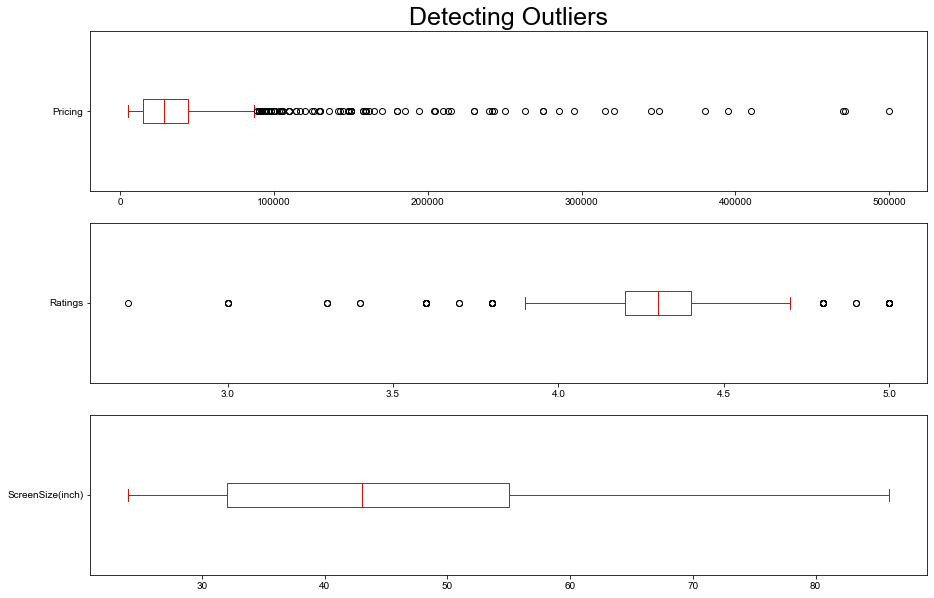

In [36]:
# Detecting the outliers using the box plot.

plt.subplot(3,1,1)
TV2.Pricing.plot(kind='box',color='red',vert=False)
plt.title('Detecting Outliers', fontsize=25)

plt.subplot(3,1,2)
TV2.Ratings.plot(kind='box',color='red',vert=False)

plt.subplot(3,1,3)
TV2['ScreenSize(inch)'].plot(kind='box',color='red',vert=False)
sns.set_style('dark')
plt.gcf().set_size_inches(15,10)
    `
# hence we can see that, there are outlier in the Pricing and Ratings columns.

In [37]:
# Detecting the outliers and saving into a variable.

pricingoutliers=TV2[TV2.Pricing>pupperbound]
print(pricingoutliers.Pricing)

# printing the outliers.

244    109999.0
258    148999.0
259    104490.0
262     91990.0
273    109999.0
         ...   
858     94990.0
868    193999.0
896    274990.0
962     94200.0
974     89999.0
Name: Pricing, Length: 93, dtype: float64


In [38]:
# Detecting the outliers and saving into a variable.

ratingsoutliersUB=TV2[TV2.Ratings>rupperbound]
print(ratingsoutliersUB.Ratings)
print(len(ratingsoutliersUB.Ratings))

# printing the outliers.

224    4.8
230    5.0
259    5.0
298    4.8
328    5.0
336    5.0
352    5.0
380    5.0
389    4.9
393    4.8
429    5.0
448    4.8
454    5.0
499    5.0
505    4.8
528    4.8
534    5.0
625    4.8
628    4.8
662    4.8
673    5.0
677    4.8
712    5.0
725    4.8
763    4.9
897    5.0
Name: Ratings, dtype: float64
26


In [39]:
# Detecting the outliers and saving into a variable.

ratingsoutliersLB=TV2[TV2.Ratings<rlowerbound]
print(ratingsoutliersLB.Ratings)
print(len(ratingsoutliersLB.Ratings))

# printing the outliers.

244    3.6
273    3.6
348    3.8
374    3.7
464    3.3
473    3.0
502    3.3
524    3.0
552    3.8
594    3.6
613    3.4
645    3.0
653    3.3
684    3.8
685    3.0
693    3.6
735    3.7
845    3.8
849    3.8
875    3.8
905    3.6
909    3.6
913    3.8
923    3.8
933    3.6
944    3.6
953    3.4
969    2.7
Name: Ratings, dtype: float64
28


In [40]:
# getting data without outliers and saving into a variable.

PWO=TV2[TV2.Pricing<pupperbound]
PWO.Pricing.describe()

# now getting all statistical values on that column.

count      890.000000
mean     28286.758427
std      17255.423062
min       5390.000000
25%      13999.000000
50%      25999.000000
75%      36999.000000
max      86990.000000
Name: Pricing, dtype: float64

In [41]:
# getting data without outliers and saving into a variable.

RWO=TV2[(TV2['Ratings']<rupperbound) & (TV2['Ratings']>rlowerbound)]
len(RWO)
RWO.Ratings.describe()

# now getting all statistical values on that column.

count    745.000000
mean       4.286174
std        0.142687
min        4.000000
25%        4.200000
50%        4.300000
75%        4.400000
max        4.700000
Name: Ratings, dtype: float64

In [42]:
# to see the missing values.

TV.isnull().sum()

# missing values in each column.

Brand                 0
ScreenSize(inch)      5
Screen_type           2
Resolution            4
Operating_System    128
Smart_tv              0
Ratings             173
Pricing               0
Pixels               80
dtype: int64

In [43]:
# replacing all the missing values respectively.

TV['ScreenSize(inch)'].replace(np.NaN,43.0,inplace=True)
TV['Screen_type'].replace(np.NaN,'LED',inplace=True)
TV['Resolution'].replace(np.NaN,'Ultra HD (4K)',inplace=True)
TV['Operating_System'].replace(np.NaN,'Android',inplace=True)
TV['Ratings'].replace(np.NaN,4.3,inplace=True)
TV['Pixels'].replace(np.NaN,'3840 x 2160',inplace=True)

# hence the next cell.

In [44]:
# here we get see the missing values.

TV.isnull().sum()

# after the exicution of above cell, we get to see no missing values.

Brand               0
ScreenSize(inch)    0
Screen_type         0
Resolution          0
Operating_System    0
Smart_tv            0
Ratings             0
Pricing             0
Pixels              0
dtype: int64

In [45]:
# droping of a column.

TV.drop(['Smart_tv'], axis=1, inplace=True)

# have no use for that column.

In [46]:
# to see the data after all the adjustments are completed.

TV

# hence the perfect data formed.

,Brand,ScreenSize(inch),Screen_type,Resolution,Operating_System,Ratings,Pricing,Pixels
0,MI,32.0,LED,HD Ready,Android,4.4,13999.0,1366 x 768
1,MI,43.0,LED,Ultra HD (4K),Android,4.3,28999.0,3840 x 2160
2,INFINIX,32.0,LED,HD Ready,Linux,4.2,8199.0,1366 x 768
3,LG,32.0,LED,HD Ready,Web,4.4,13990.0,1366 x 768
4,REALME,32.0,LED,HD Ready,Android,4.3,11999.0,1366 x 768
...,...,...,...,...,...,...,...,...
979,DETEL,43.0,LED,Full HD,Android,4.1,23147.0,1920 x 1080
980,TOSHIBA,55.0,LED,Ultra HD (4K),Google TV,4.3,36999.0,3840 x 2160
981,TOSHIBA,43.0,LED,Ultra HD (4K),Google TV,4.3,27999.0,3840 x 2160
982,DETEL,55.0,LED,Ultra HD (4K),Android,4.1,34671.0,3840 x 2160


### Step - 5
- Visualization of the Entire Data using different Plots, Charts and Graphs. 
- Insights are provided by seeing the analysis.
- Here the visualization is done the entire data and not only for the Problem Statement.

#### Kind of Visualizations are split according to type of Analysis.
- UNI - VARIATE ANALYSIS
- BI - VARIATE ANALYSIS
- MULTI - VARIATE ANALYSIS

#### These are the Plots, graphs and Charts used in visualy analysing the entire Data.
- Bar plots
- Count plots
- Pie charts
- Box plots
- Histograms
- Dist plots
- KDE plots
- Scatter plots
- Pair plots
- Heat maps

## UNI - Variate Analysis

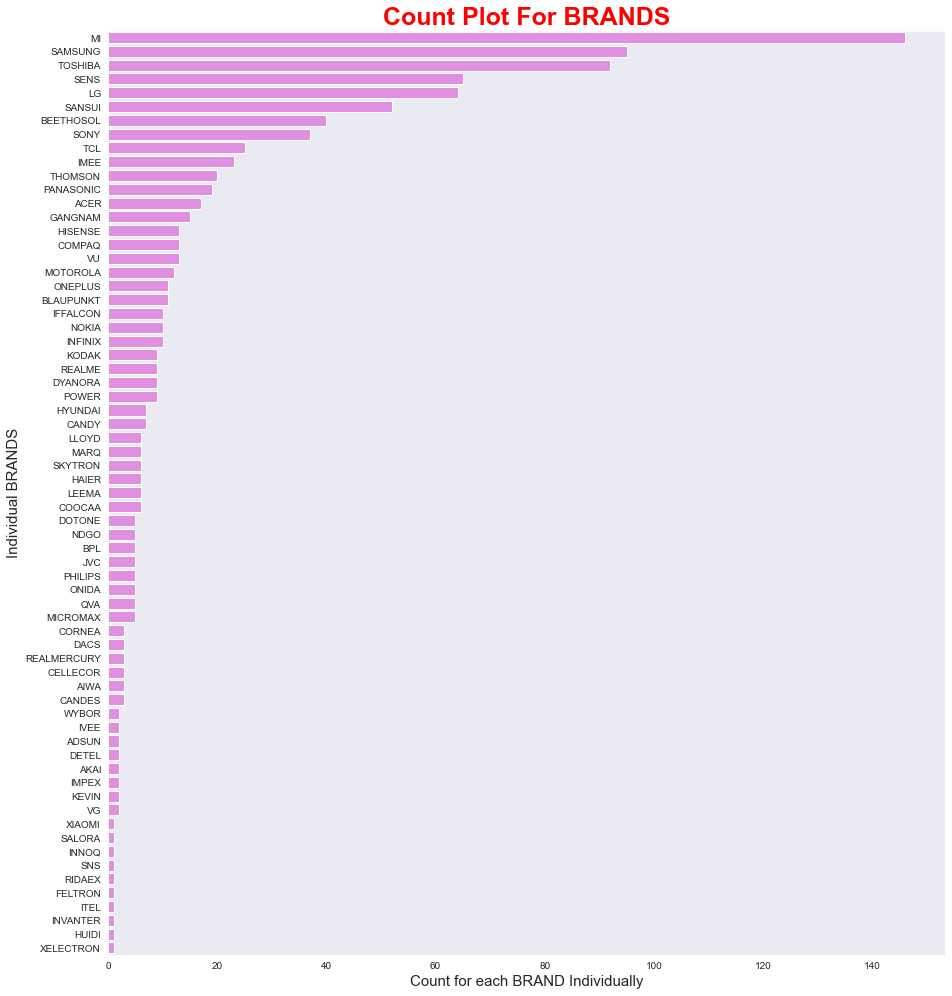

In [47]:
# count plot for Brand columns.

plt.figure(figsize=(15,17))
sns.set_style('dark')
sns.countplot(y=TV.Brand,data=TV,order=TV.Brand.value_counts().index,color='violet') #ec = edge colour
plt.xlabel('Count for each BRAND Individually',fontsize=15)
plt.ylabel('Individual BRANDS',fontsize=15)
plt.title('Count Plot For BRANDS',fontsize=25,fontweight='bold',color='red')
plt.show()

# for all brands count is displayed.

#### INSIGHTS
- Out of all the Brands "MI" is holding 1st position in numbers.
- Last brand in according to number of products is "XELECTRON".
- Top 5 Brands holding highest in numbers are : "MI", "SAMSUNG", "TOSHIBA", "SENS" and "LG".
- Least 5 Brands holding least in numbers are : "XELECTRON", "HUIDI", "INVANTER", "ITEL" and "FELTRON".

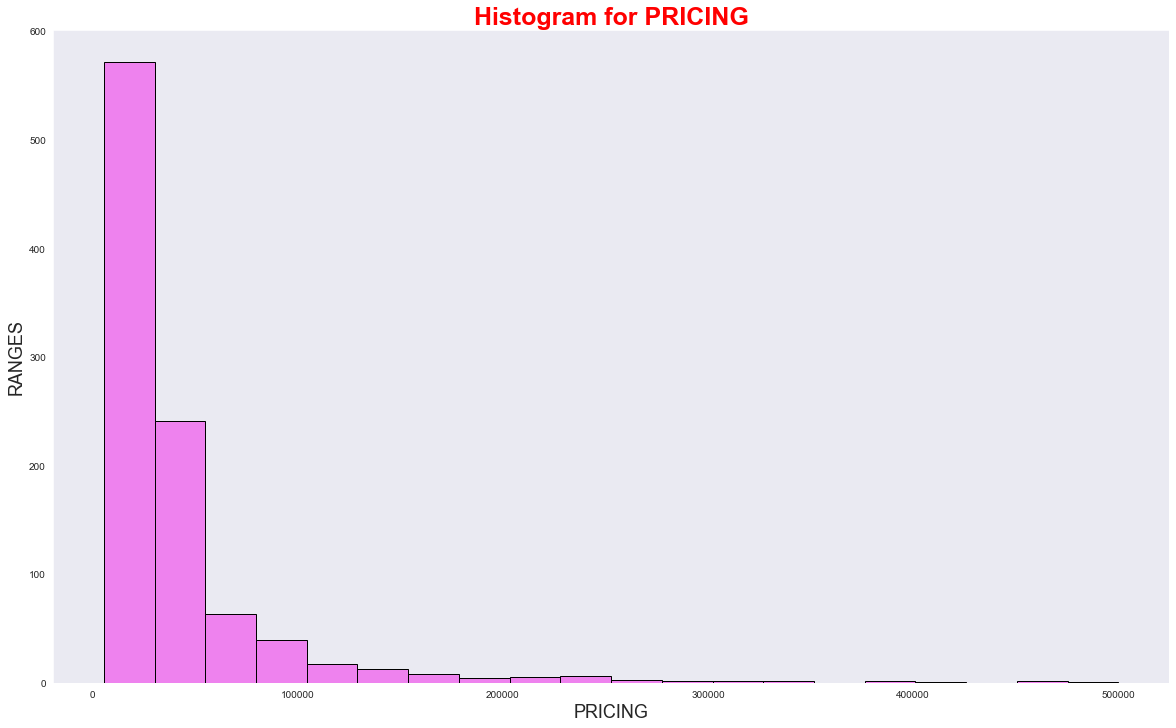

In [48]:
# Histogram for Pricing.

plt.figure(figsize=(20,12))
sns.set_style('dark')
plt.hist(TV.Pricing,color='violet',bins=20,ec='black')
plt.xlabel('PRICING',fontsize=18)
plt.ylabel('RANGES',fontsize=18)
plt.title('Histogram for PRICING',fontsize=25,fontweight='bold',color='red')
plt.show()

# for Pricing column range of distribution id displayed through Histogram.

#### INSIGHTS
- Most of the Prices of the products are lying between "0" to just above "1,00,000".
- Very less spread within the remaining ranges of Prices.
- the spread is almost decreasing as its going to higher Prices.

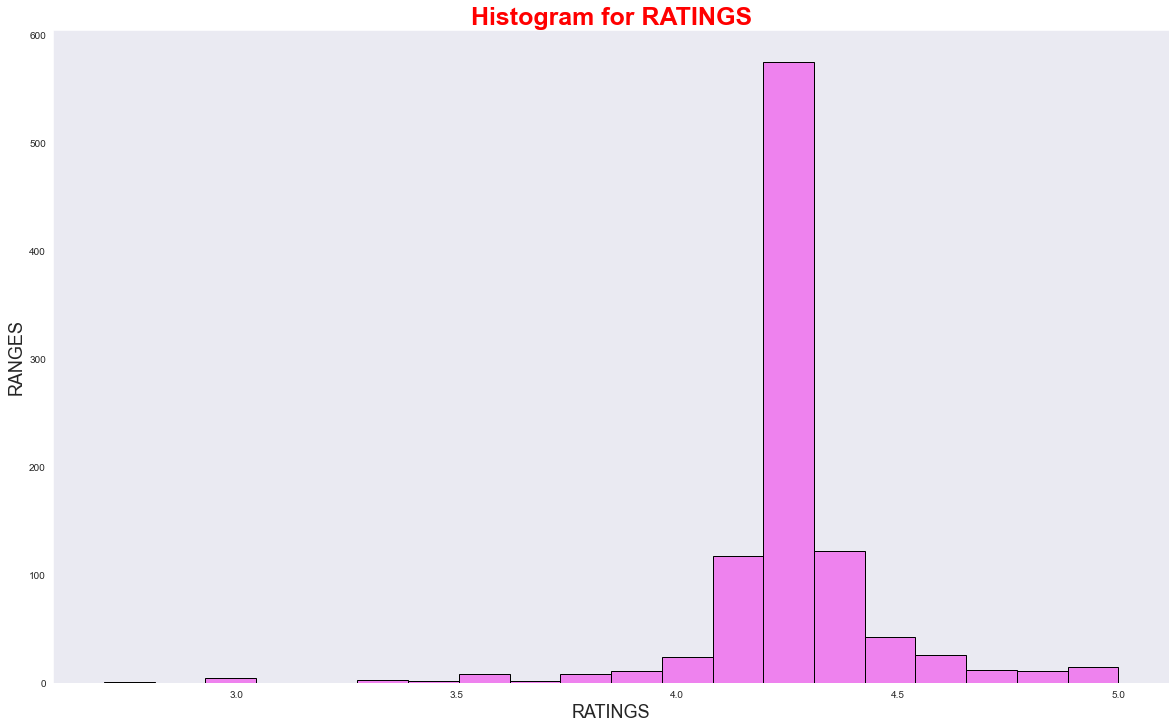

In [49]:
# Histogram for Ratings.

plt.figure(figsize=(20,12))
sns.set_style('dark')
plt.hist(TV.Ratings,color='violet',bins=20,ec='black')
plt.xlabel('RATINGS',fontsize=18)
plt.ylabel('RANGES',fontsize=18)
plt.title('Histogram for RATINGS',fontsize=25,fontweight='bold',color='red')
plt.show()

# for Ratings column range of distribution id displayed through Histogram.

#### INSIGHTS
- Most of the ratings range for average of the products lies in between "4.0" and "4.6".
- There is a lil bit of rise as it reaches "5.0".
- Very less within "0" and "3.0".

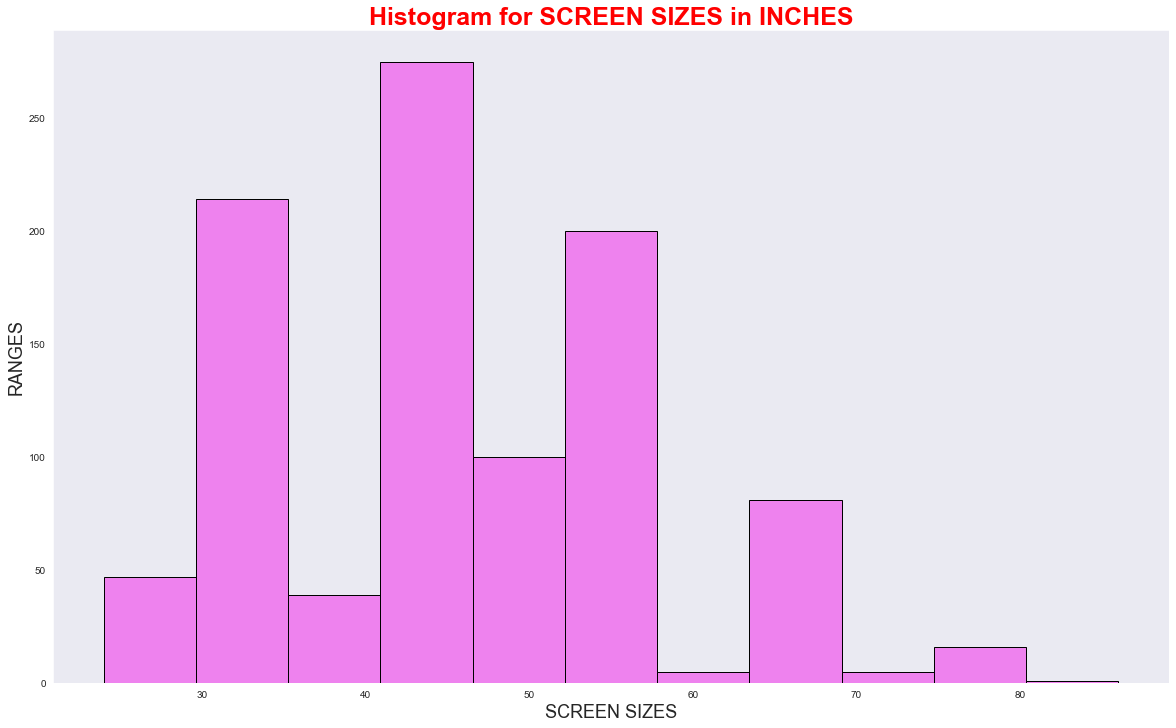

In [50]:
# Histogram for Screen sizes.

plt.figure(figsize=(20,12))
sns.set_style('dark')
plt.hist(TV['ScreenSize(inch)'],color='violet',bins=11,ec='black')
plt.xlabel('SCREEN SIZES',fontsize=18)
plt.ylabel('RANGES',fontsize=18)
plt.title('Histogram for SCREEN SIZES in INCHES',fontsize=25,fontweight='bold',color='red')
plt.show()

# for Screen sizes  column range of distribution id displayed through Histogram.

#### INSIGHTS
- Ranges of screen sizes are vivid in data.
- most lie between "40" and "50" with more than 250.
- 2nd goes between "30" and "40" with 200+.
- 3rd goes between "50" and "60" with near to 200.

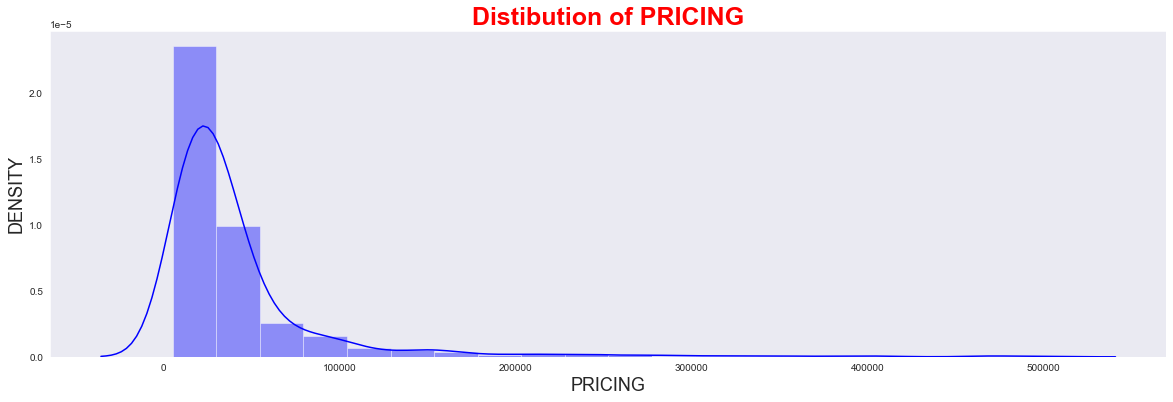

In [51]:
# distplot for Pricing column.

plt.figure(figsize=(20,6))
sns.set_style('dark')
sns.distplot(TV2.Pricing,color='blue',bins=20) # bind = no. of bars in plots
plt.xlabel('PRICING',fontsize=18)
plt.ylabel('DENSITY',fontsize=18)
plt.title("Distibution of PRICING",fontsize=25,fontweight='bold',color='red')
plt.show()

# range of distribution id displayed.

#### INSIGHTS
- mixer of Hist plot and KDE plots.
- Most of the Prices of the products are lying between "0" to just above "1,00,000".
- Very less spread within the remaining ranges of Prices.
- the spread is almost decresing as its going to higher Prices.

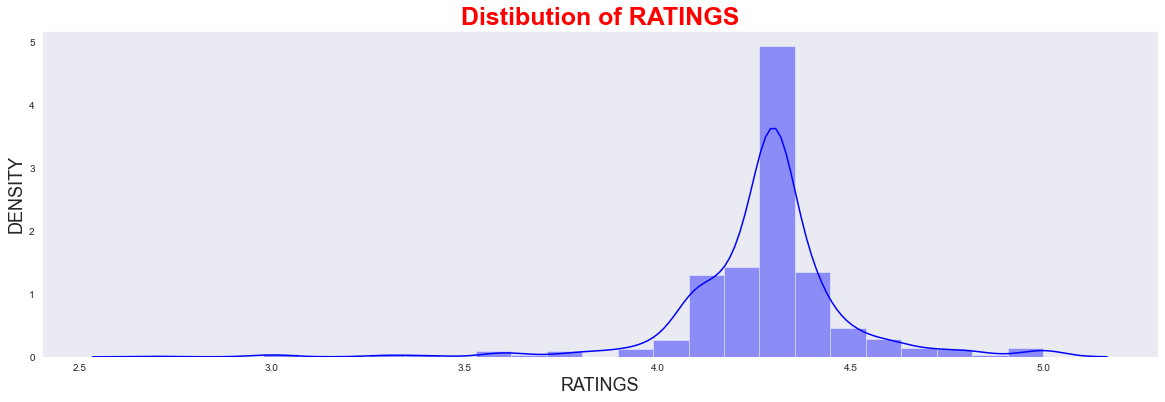

In [52]:
# distplot for Ratings column.

plt.figure(figsize=(20,6))
sns.set_style('dark')
sns.distplot(TV.Ratings,color='blue',bins=25) # bins = no. of bars in plots
plt.xlabel('RATINGS',fontsize=18)
plt.ylabel('DENSITY',fontsize=18)
plt.title("Distibution of RATINGS",fontsize=25,fontweight='bold',color='red')
plt.show()

# Range of distibution is displayed.

#### INSIGHTS
- Mixer of hist and KDE plots.
- Most of the ratings range for average of the products lies in between "4.0" and "4.6".
- There is a lil bit of rise as it reaches "5.0".
- Very less within "0" and "3.0".

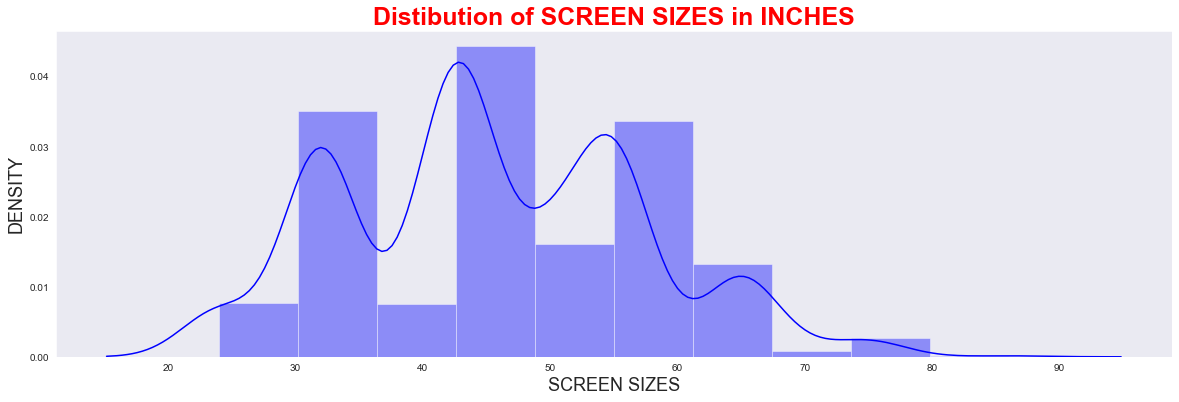

In [53]:
# Dist plot for Screen sizes in inches column.

plt.figure(figsize=(20,6))
sns.set_style('dark')
sns.distplot(TV['ScreenSize(inch)'],color='blue',bins=10) # bind = no. of bars in plots
plt.xlabel('SCREEN SIZES',fontsize=18)
plt.ylabel('DENSITY',fontsize=18)
plt.title("Distibution of SCREEN SIZES in INCHES",fontsize=25,fontweight='bold',color='red')
plt.show()

# Range of distibution is displayed.

#### INSIGHTS
- Mixer of histplot and KDE plots.
- Ranges of screen sizes are vivid in data.
- most lie between "40" and "50" with more than 250.
- 2nd goes between "30" and "40" with 200+.
- 3rd goes between "50" and "60" with near to 200.

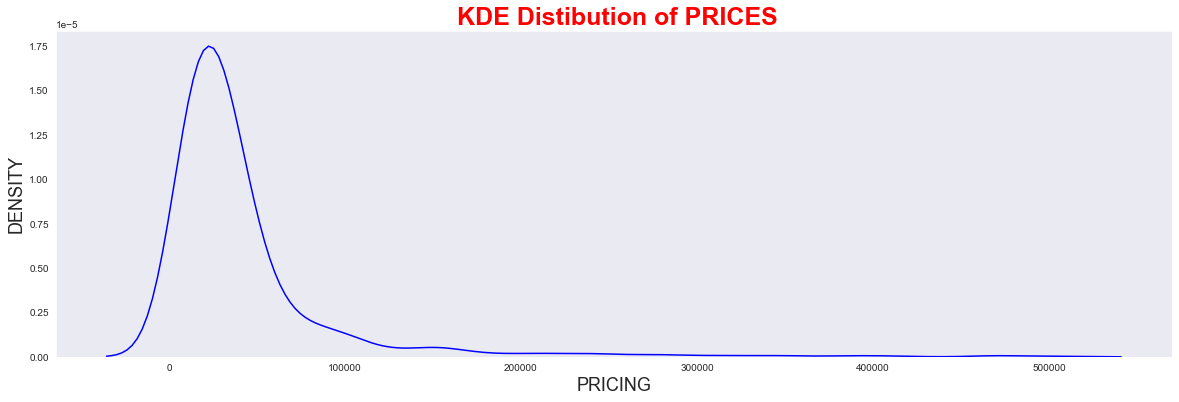

In [54]:
# KDE plot for pricing column.

plt.figure(figsize=(20,6))
sns.set_style('dark')
sns.distplot(TV.Pricing,color='blue',bins=50,hist=False) # bind = no. of bars in plots
plt.xlabel('PRICING',fontsize=18)
plt.ylabel('DENSITY',fontsize=18)
plt.title(" KDE Distibution of PRICES",fontsize=25,fontweight='bold',color='red')
plt.show()

# Range of distibution is displayed.

#### INSIGHTS
- KDE - Kernel Density Estimation plot.
- Most of the Prices of the products are lying between "0" to just above "1,00,000".
- Very less spread within the remaining ranges of Prices.
- the spread is almost decresing as its going to higher Prices.

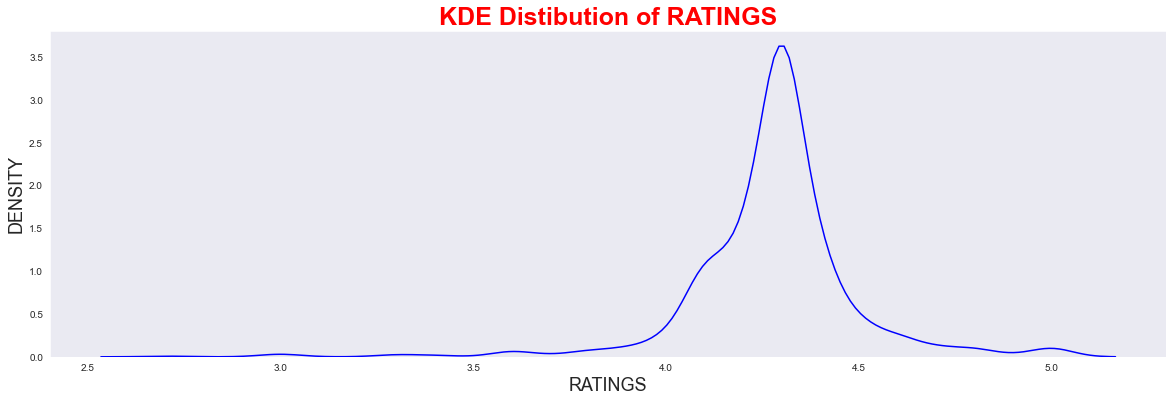

In [55]:
# KDE plot for Ratings column.

plt.figure(figsize=(20,6))
sns.set_style('dark')
sns.distplot(TV.Ratings,color='blue',bins=25, hist=False) # bins = no. of bars in plots
plt.xlabel('RATINGS',fontsize=18)
plt.ylabel('DENSITY',fontsize=18)
plt.title("KDE Distibution of RATINGS",fontsize=25,fontweight='bold',color='red')
plt.show()

# Range of distibution is displayed.

#### INSIGHTS
- KDE - Kernel Density Estimation plot.
- Most of the ratings range for average of the products lies in between "4.0" and "4.6".
- There is a lil bit of rise as it reaches "5.0".
- Very less within "0" and "3.0".

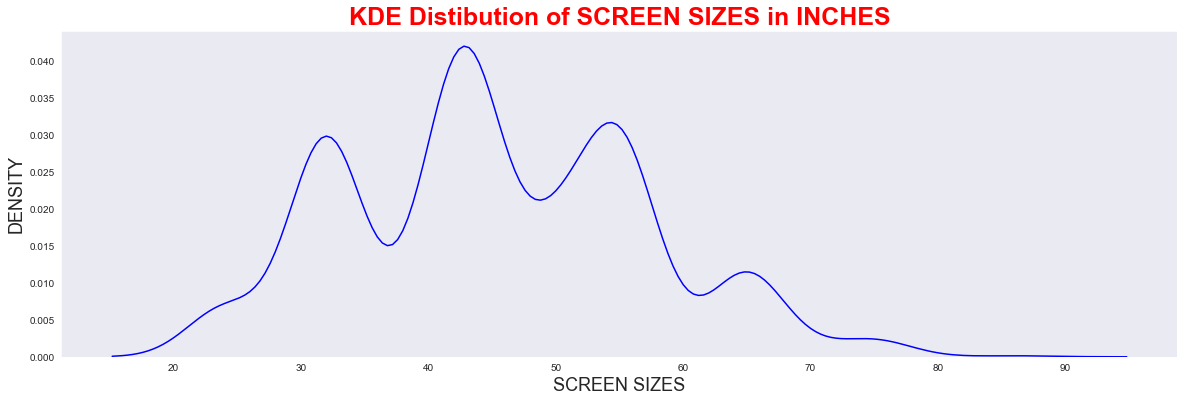

In [56]:
# KDE plot for Screen sizes column.

plt.figure(figsize=(20,6))
sns.set_style('dark')
sns.distplot(TV['ScreenSize(inch)'],color='blue',bins=10, hist=False) # bind = no. of bars in plots
plt.xlabel('SCREEN SIZES',fontsize=18)
plt.ylabel('DENSITY',fontsize=18)
plt.title("KDE Distibution of SCREEN SIZES in INCHES",fontsize=25,fontweight='bold',color='red')
plt.show()

# Range of distibution is displayed.

#### INSIGHTS
- KDE - Kernel Density Estimation plot.
- Ranges of screen sizes are vivid in data.
- most lie between "40" and "50" with more than 250.
- 2nd goes between "30" and "40" with 200+.
- 3rd goes between "50" and "60" with near to 200.

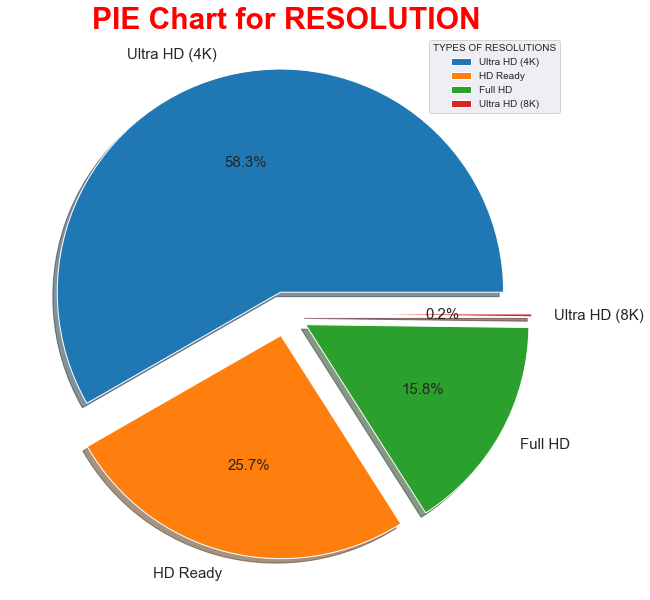

In [57]:
# Pie plot for Resolution column.

plt.figure(figsize=(10,15))
sns.set_style('dark')
plt.pie(x=TV.Resolution.value_counts().values,labels=TV.Resolution.value_counts().index,shadow=True,explode=(0.1,0.1,0.1,0.1),autopct='%.1f%%',textprops={'fontsize':15})
plt.title('PIE Chart for RESOLUTION',fontsize=30,fontweight='bold',color='red')
plt.legend(title='TYPES OF RESOLUTIONS',loc=1)
plt.show()

# percentage of each catagory.

#### INSIGHTS
- We get to see that "Ultra HD (4K)" holds more percentage than any other with wooping 58.3% amongst all products.
- We get to see that "HD Ready" holds 2nd more percentage than any other with 25.7% amongst all products.
- We get to see that "Full HD" holds 3rd more percentage than any other with 15.8% amongst all products.
- We get to see that "Ultra HD (8K)" holds last place in percentage than any other with 0.2% amongst all products.

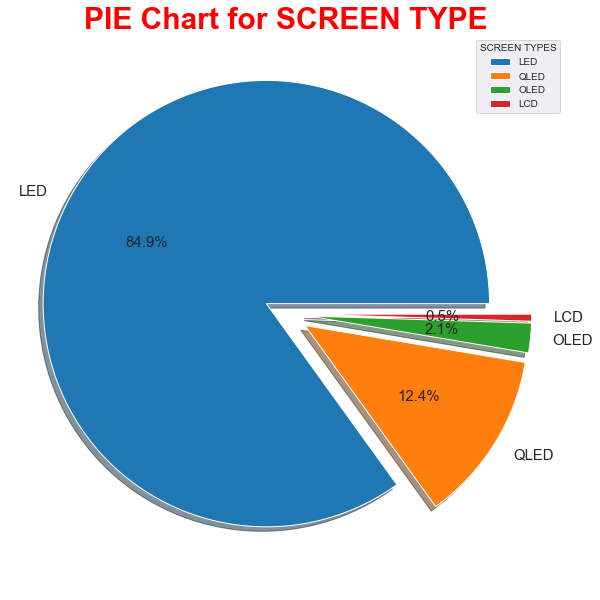

In [58]:
# Pie chart for Screen Type column.

plt.figure(figsize=(10,15))
sns.set_style('dark')
plt.pie(x=TV.Screen_type.value_counts().values,labels=TV.Screen_type.value_counts().index,explode=(0.1,0.1,0.1,0.1),shadow=True,autopct='%.1f%%',textprops={'fontsize':15})
plt.title('PIE Chart for SCREEN TYPE',fontsize=30,fontweight='bold',color='red')
plt.legend(title='SCREEN TYPES',loc=1)
plt.show()

# percentage of each catagory.

#### INSIGHTS
- We get to see that "LED" holds more percentage than any other with wooping 84.9% amongst all products.
- We get to see that "QLED" holds 2nd more percentage than any other with 12.4% amongst all products.
- We get to see that "OLED" holds 3rd place in percentage than any other with 2.1% amongst all products.
- We get to see that "LCD" holds last place in percentage than any other with 0.5% amongst all products.

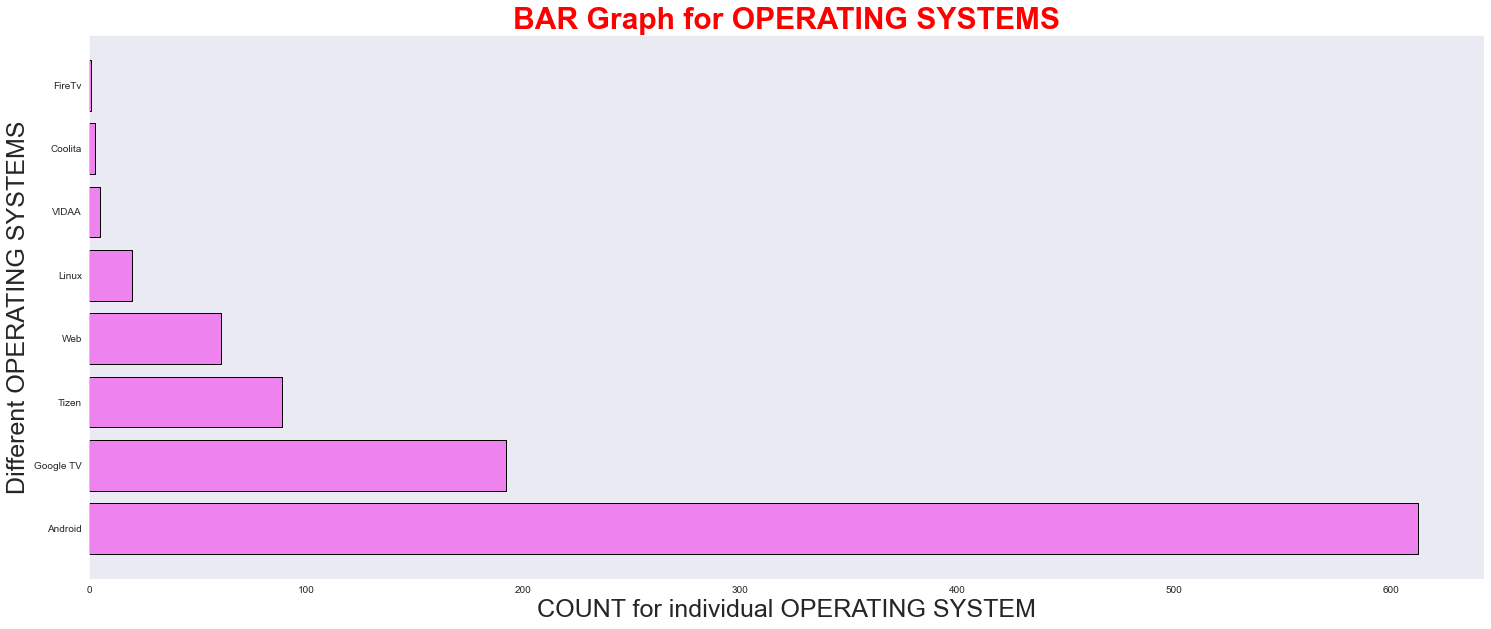

In [59]:
# Bar plot for Operating system column.

plt.figure(figsize=(25,10))
sns.set_style('dark')
plt.barh(TV.Operating_System.value_counts().index,TV.Operating_System.value_counts().values,color='violet',ec='black',height=0.8)
plt.xlabel('COUNT for individual OPERATING SYSTEM',fontsize=25)
plt.ylabel('Different OPERATING SYSTEMS',fontsize=25)
plt.title('BAR Graph for OPERATING SYSTEMS',fontsize=30,fontweight='bold',color='red')
plt.show()

# Highest to lowest is Displayed.

#### INSIGHTS
- We get to see that "Android" OS is most used amongst the Products.
- We get to see that "Google Tv" OS is the 2nd most used amongst the Products.
- We get to see that "FireTv" OS is least used amongst the Products.
- Most to least are lined up accordingly.

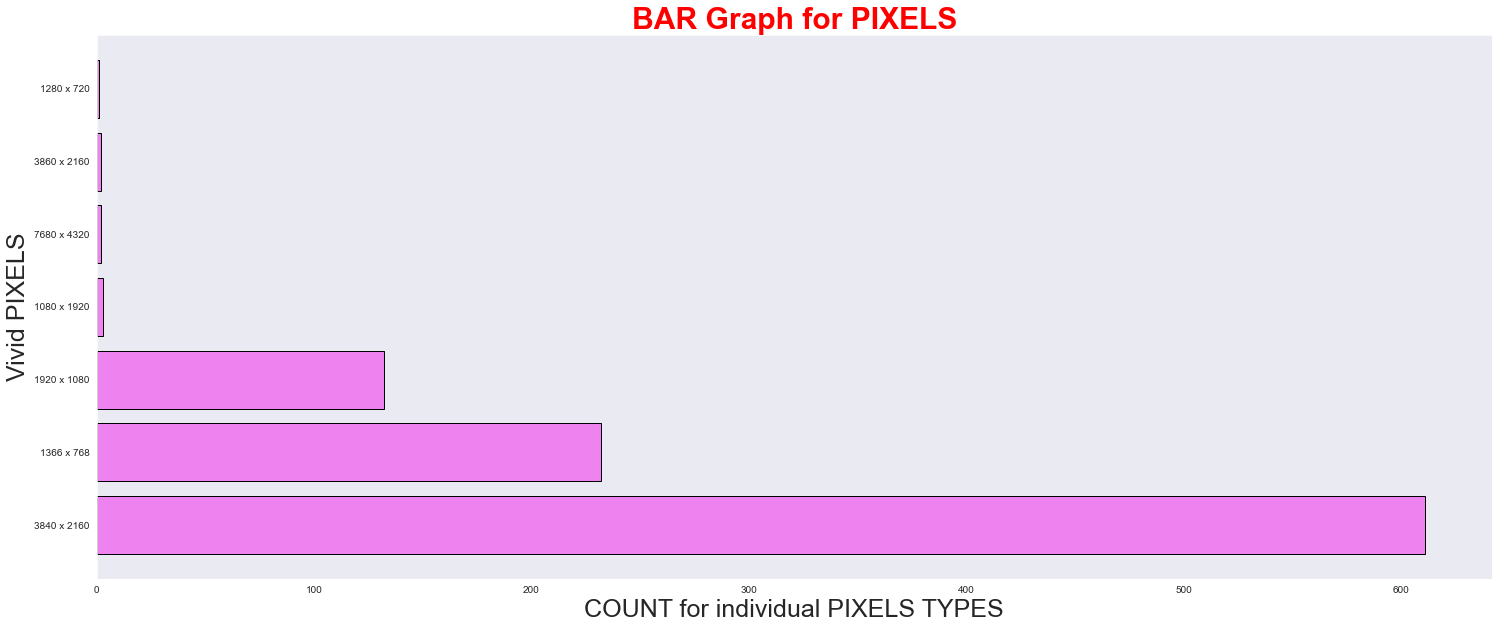

In [60]:
# Bar plot for Pixels column.

plt.figure(figsize=(25,10))
sns.set_style('dark')
plt.barh(TV.Pixels.value_counts().index,TV.Pixels.value_counts().values,color='violet',ec='black',height=0.8)
plt.xlabel('COUNT for individual PIXELS TYPES',fontsize=25)
plt.ylabel('Vivid PIXELS',fontsize=25)
plt.title('BAR Graph for PIXELS',fontsize=30,fontweight='bold',color='red')
plt.show()

# Highest to lowest is Displayed.

#### INSIGHTS
- We get to see that "3840 x 2160" Pixels is most used amongst the Products.
- We get to see that "1366 x 768" Pixels is the 2nd most used amongst the Products.
- We get to see that "1280 x 720" Pixels is least used amongst the Products.
- Most to least are lined up accordingly.

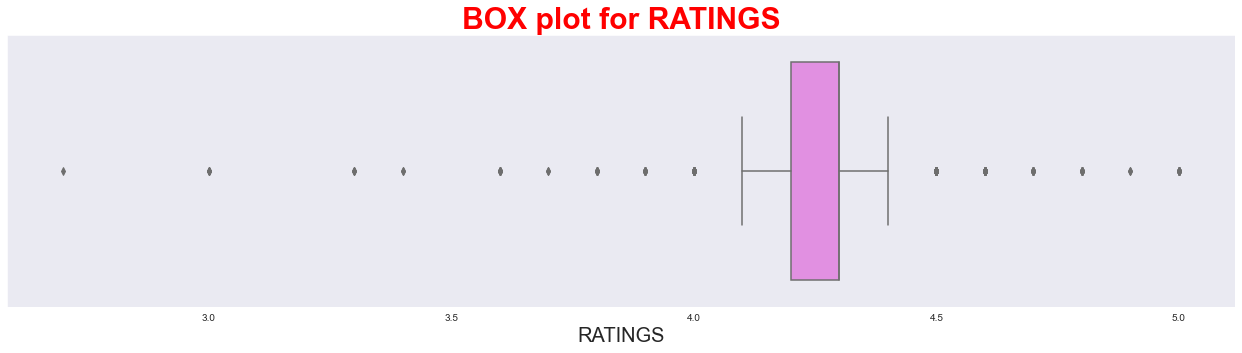

In [61]:
# Box plot for Ratings.

plt.figure(figsize=(22,5))
sns.set_style('dark')
sns.boxplot(x=TV.Ratings,color='violet')
plt.xlabel('RATINGS',fontsize=20)
plt.title('BOX plot for RATINGS',fontsize=30,fontweight='bold',color='red')
plt.show()

# Outliers detection.

#### INSIGHTS
- we get to see the Outliers in both ends.
- we get to see the Outliers in lowerbound starting from "4.1".
- we get to see the Outliers in upperbound starting from "4.4".

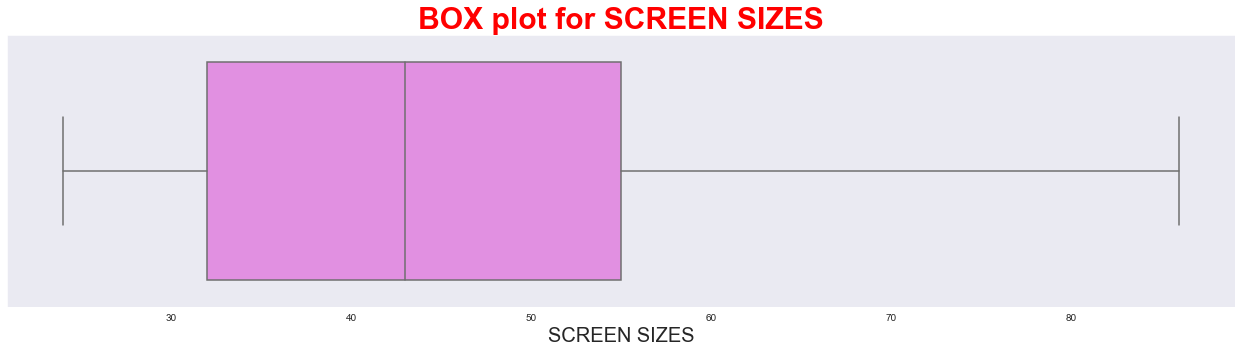

In [62]:
# box plot for Screen sizes. 

plt.figure(figsize=(22,5))
sns.set_style('dark')
sns.boxplot(x=TV['ScreenSize(inch)'],color='violet')
plt.xlabel('SCREEN SIZES',fontsize=20)
plt.title('BOX plot for SCREEN SIZES',fontsize=30,fontweight='bold',color='red')
plt.show()

# Outliers detection.

#### INSIGHTS
- we get to see no Ouliers exist in this column.
- as we know that the inches have vivid spread in the data.

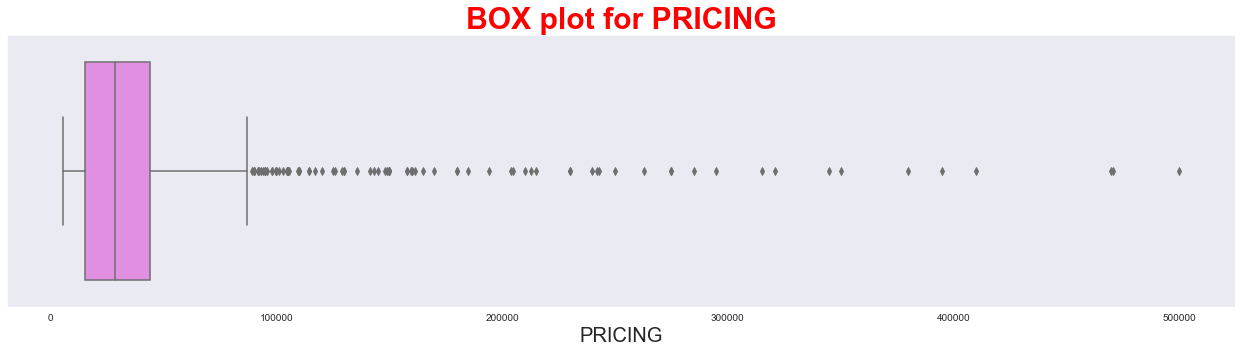

In [63]:
plt.figure(figsize=(22,5))
sns.set_style('dark')
sns.boxplot(x=TV.Pricing,color='violet')
plt.xlabel('PRICING',fontsize=20)
plt.title('BOX plot for PRICING',fontsize=30,fontweight='bold',color='red')
plt.show()

#### INSIGHTS
- we get to see Outlilers exits in this column.
- we get to see the Outliers exist in upperbound.
- we get to see that Outliers starts from around 90k to 5L.

## BI - Variate analysis

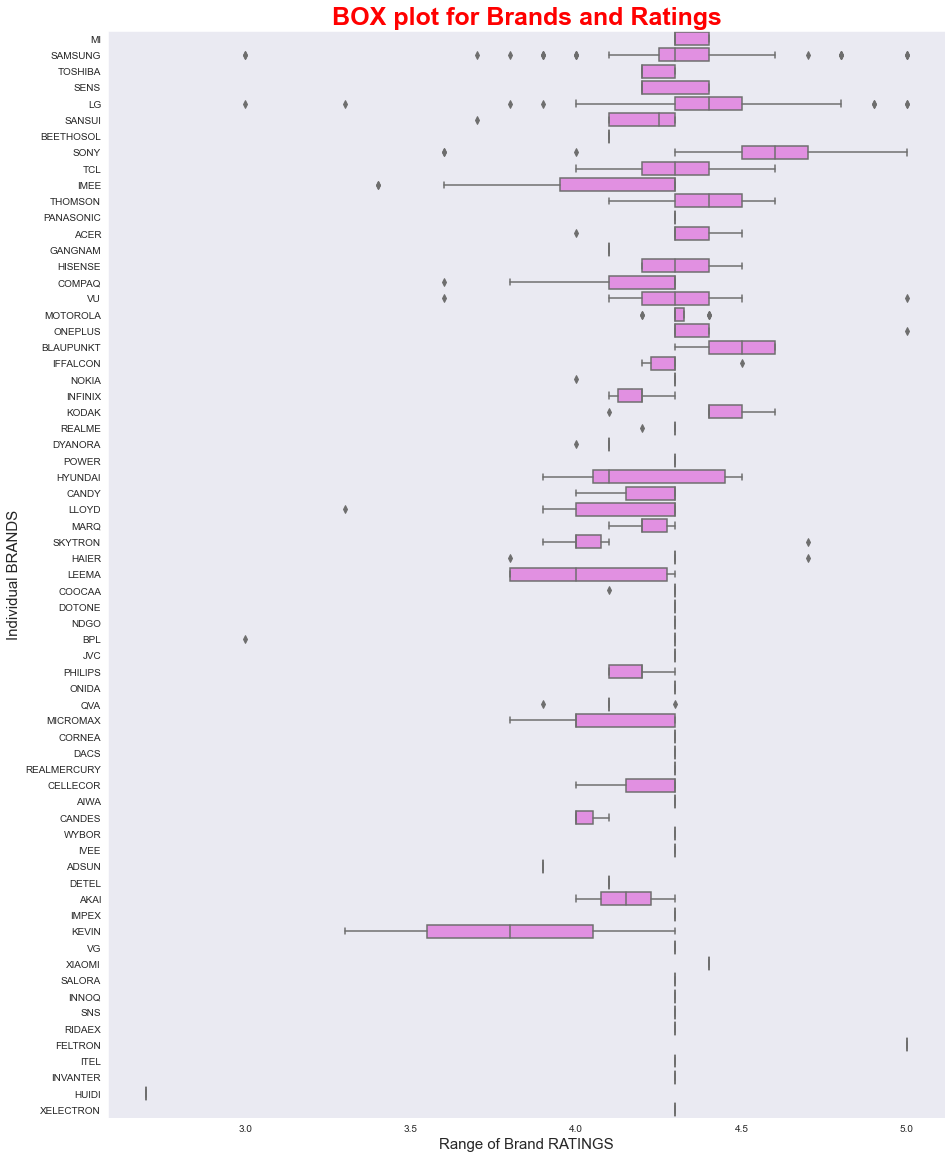

In [64]:
plt.figure(figsize=(15,20))
sns.set_style('dark')
sns.boxplot(x='Ratings',y='Brand',data=TV,order=TV.Brand.value_counts().index,color='violet')
plt.ylabel('Individual BRANDS',fontsize=15)
plt.xlabel('Range of Brand RATINGS',fontsize=15)
plt.title("BOX plot for Brands and Ratings",fontsize=25,fontweight='bold',color='red')
plt.show()

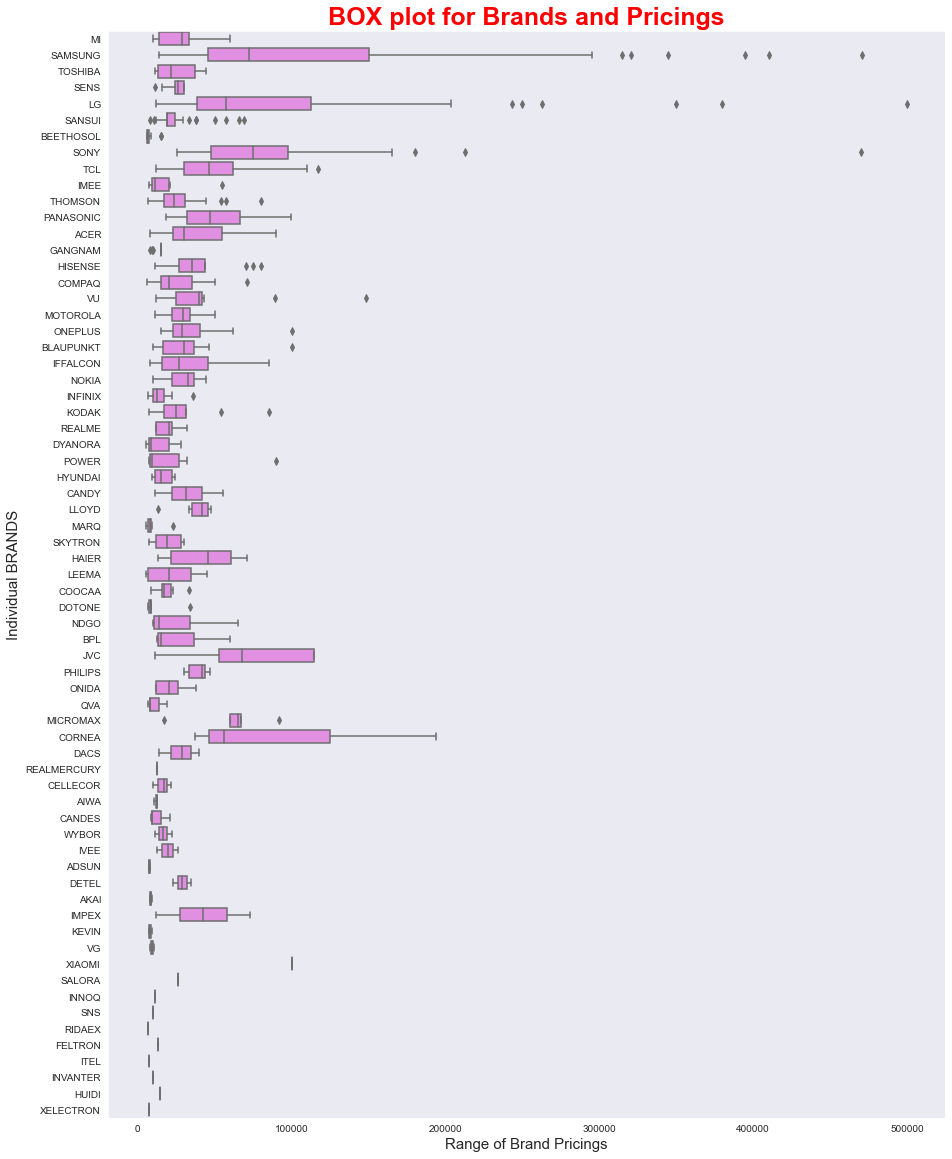

In [65]:
plt.figure(figsize=(15,20))
sns.set_style('dark')
sns.boxplot(x='Pricing',y='Brand',data=TV,order=TV.Brand.value_counts().index,color='violet')
plt.ylabel('Individual BRANDS',fontsize=15)
plt.xlabel('Range of Brand Pricings',fontsize=15)
plt.title("BOX plot for Brands and Pricings",fontsize=25,fontweight='bold',color='red')
plt.show()

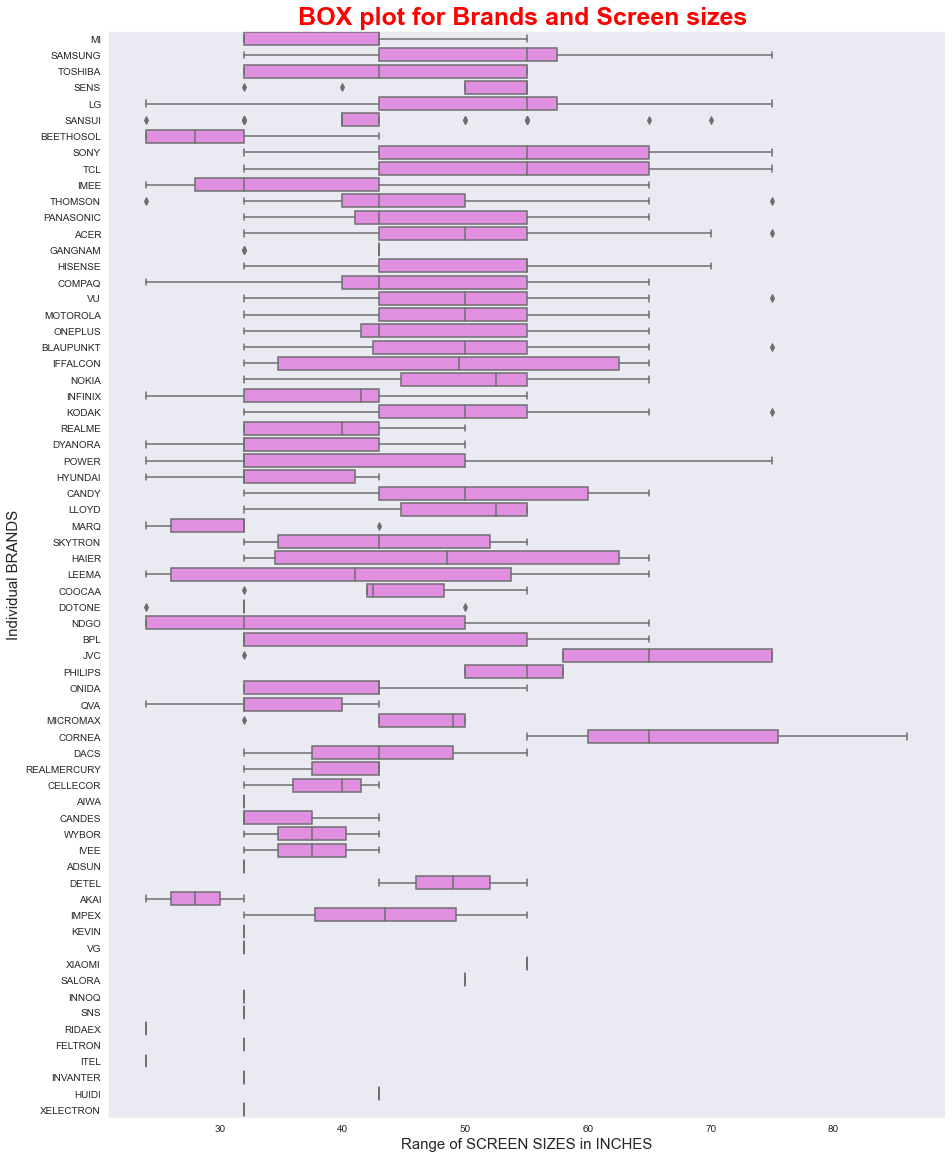

In [66]:
plt.figure(figsize=(15,20))
sns.set_style('dark')
sns.boxplot(x='ScreenSize(inch)',y='Brand',data=TV,order=TV.Brand.value_counts().index,color='violet')
plt.ylabel('Individual BRANDS',fontsize=15)
plt.xlabel('Range of SCREEN SIZES in INCHES',fontsize=15)
plt.title("BOX plot for Brands and Screen sizes ",fontsize=25,fontweight='bold',color='red')
plt.show()

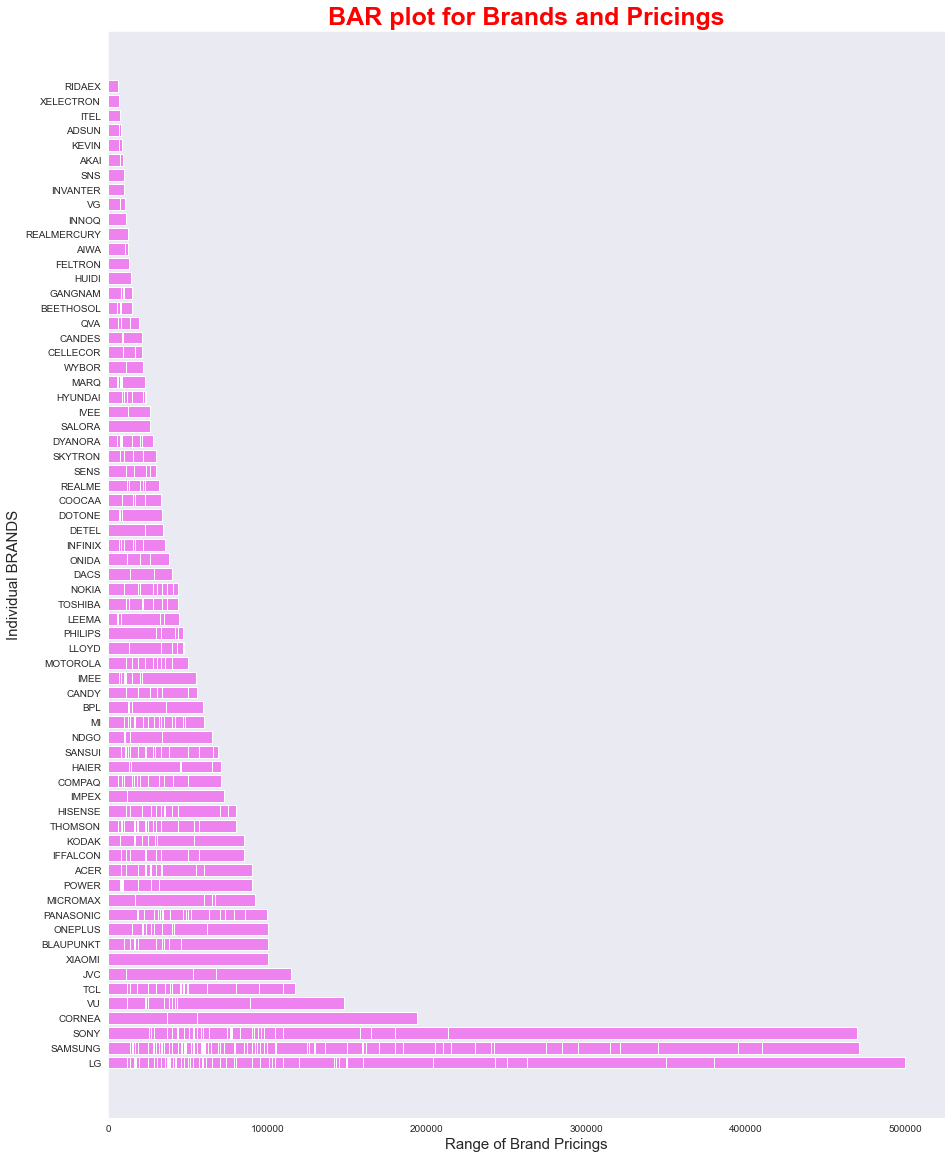

In [67]:
plt.figure(figsize=(15,20))
sns.set_style('dark')
TV_pricesort=TV.sort_values('Pricing',ascending=False)
plt.barh(TV_pricesort.Brand,TV_pricesort.Pricing,color='violet')
plt.ylabel('Individual BRANDS',fontsize=15)
plt.xlabel('Range of Brand Pricings',fontsize=15)
plt.title("BAR plot for Brands and Pricings",fontsize=25,fontweight='bold',color='red')
plt.show()

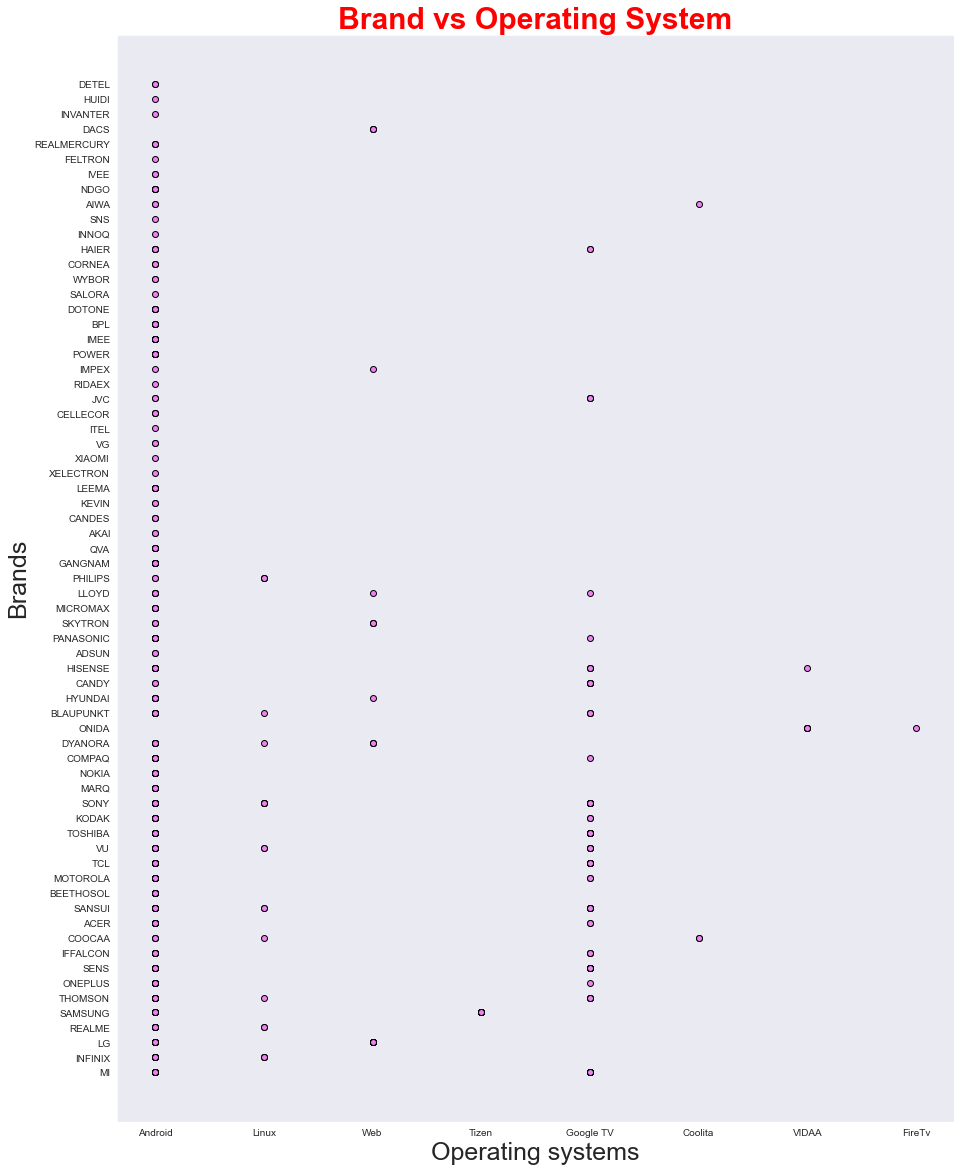

In [68]:
plt.figure(figsize=(15, 20))
plt.scatter(TV['Operating_System'],TV['Brand'],color='violet',ec='black')
plt.xlabel('Operating systems',fontsize=25)
plt.ylabel('Brands',fontsize=25)
plt.title('Brand vs Operating System',fontsize=30,fontweight='bold',color='red')
plt.show()

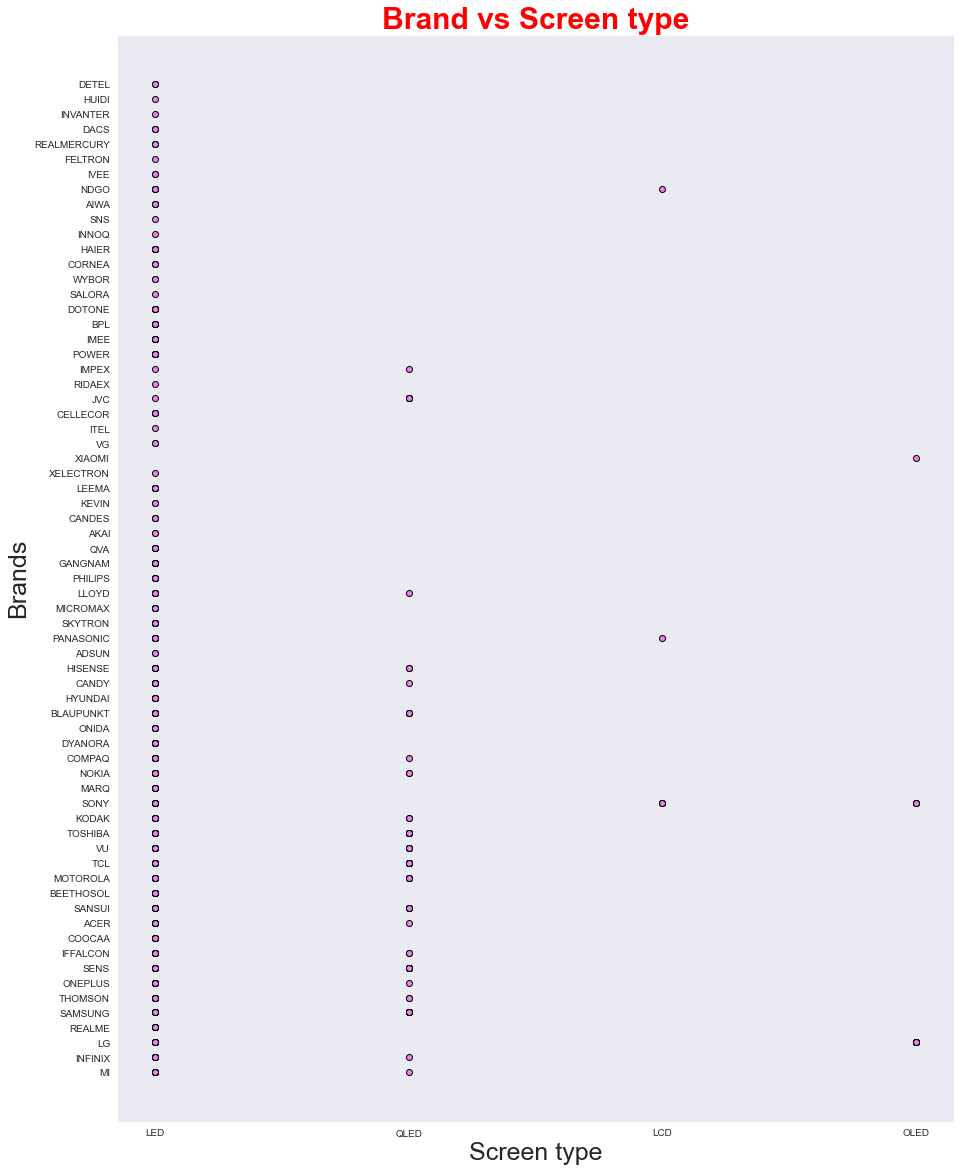

In [69]:
plt.figure(figsize=(15, 20))
plt.scatter(TV['Screen_type'],TV['Brand'],color='violet',ec='black')
plt.xlabel('Screen type',fontsize=25)
plt.ylabel('Brands',fontsize=25)
plt.title('Brand vs Screen type',fontsize=30,fontweight='bold',color='red')
plt.show()

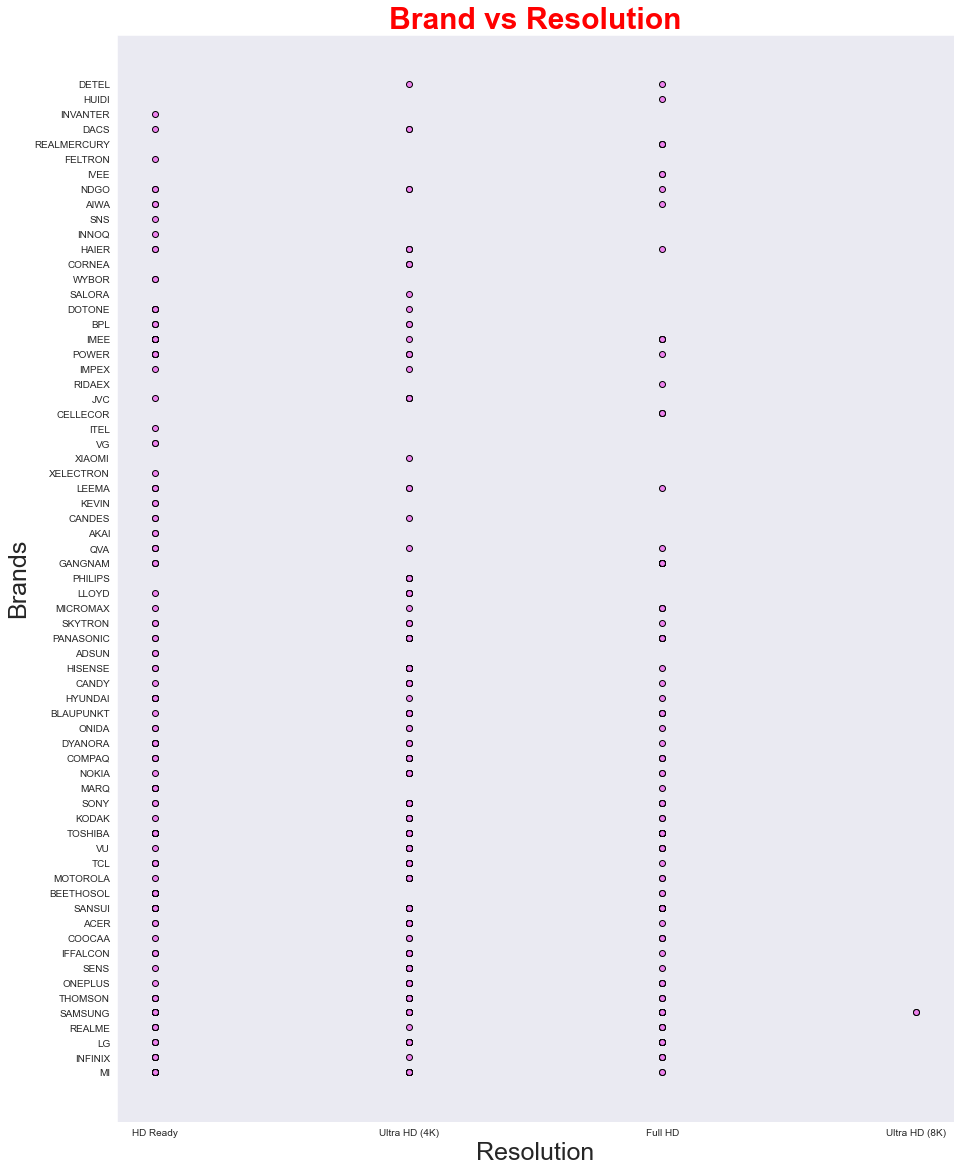

In [70]:
plt.figure(figsize=(15, 20))
plt.scatter(TV['Resolution'],TV['Brand'],color='violet',ec='black')
plt.xlabel('Resolution',fontsize=25)
plt.ylabel('Brands',fontsize=25)
plt.title('Brand vs Resolution',fontsize=30,fontweight='bold',color='red')
plt.show()

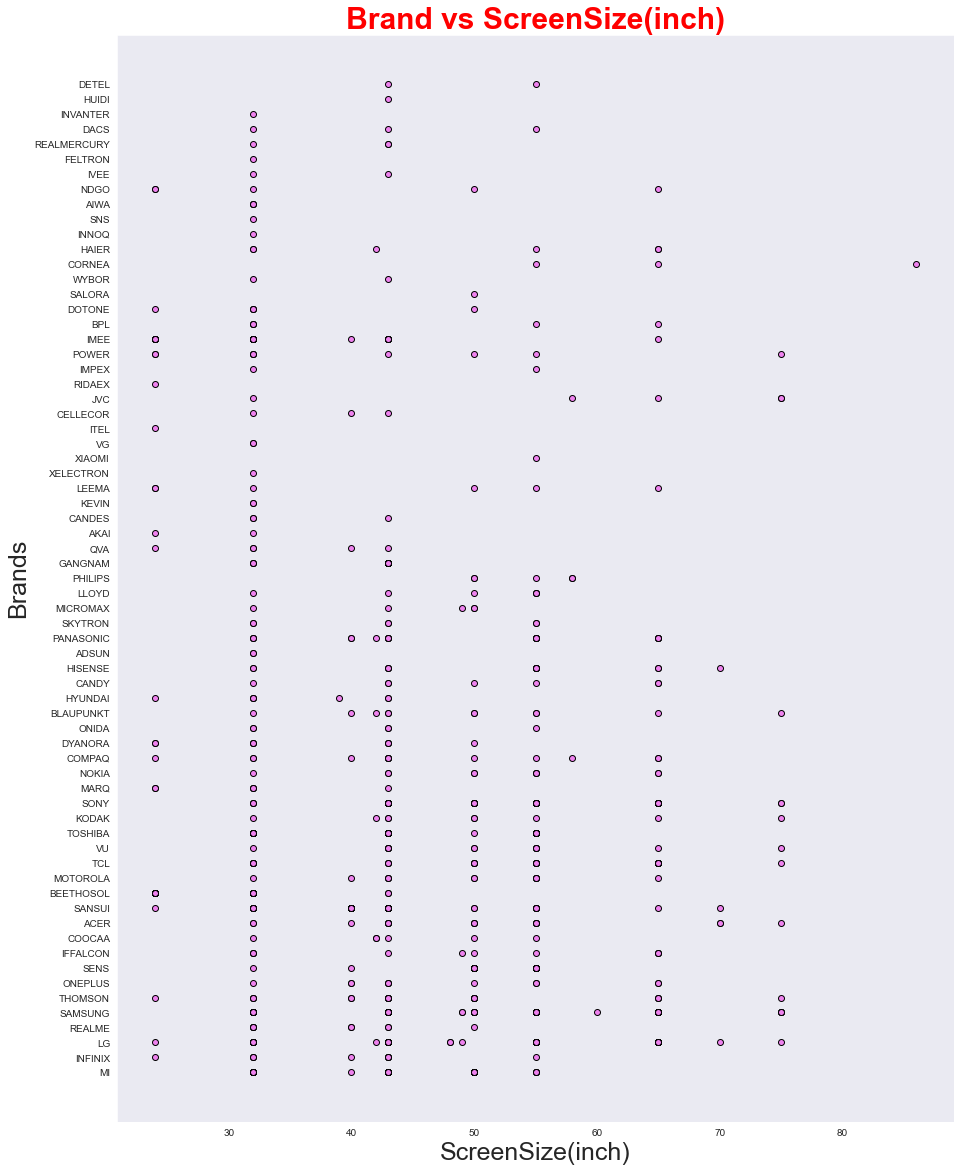

In [71]:
plt.figure(figsize=(15, 20))
plt.scatter(TV['ScreenSize(inch)'],TV['Brand'],color='violet',ec='black')
plt.xlabel('ScreenSize(inch)',fontsize=25)
plt.ylabel('Brands',fontsize=25)
plt.title('Brand vs ScreenSize(inch)',fontsize=30,fontweight='bold',color='red')
plt.show()

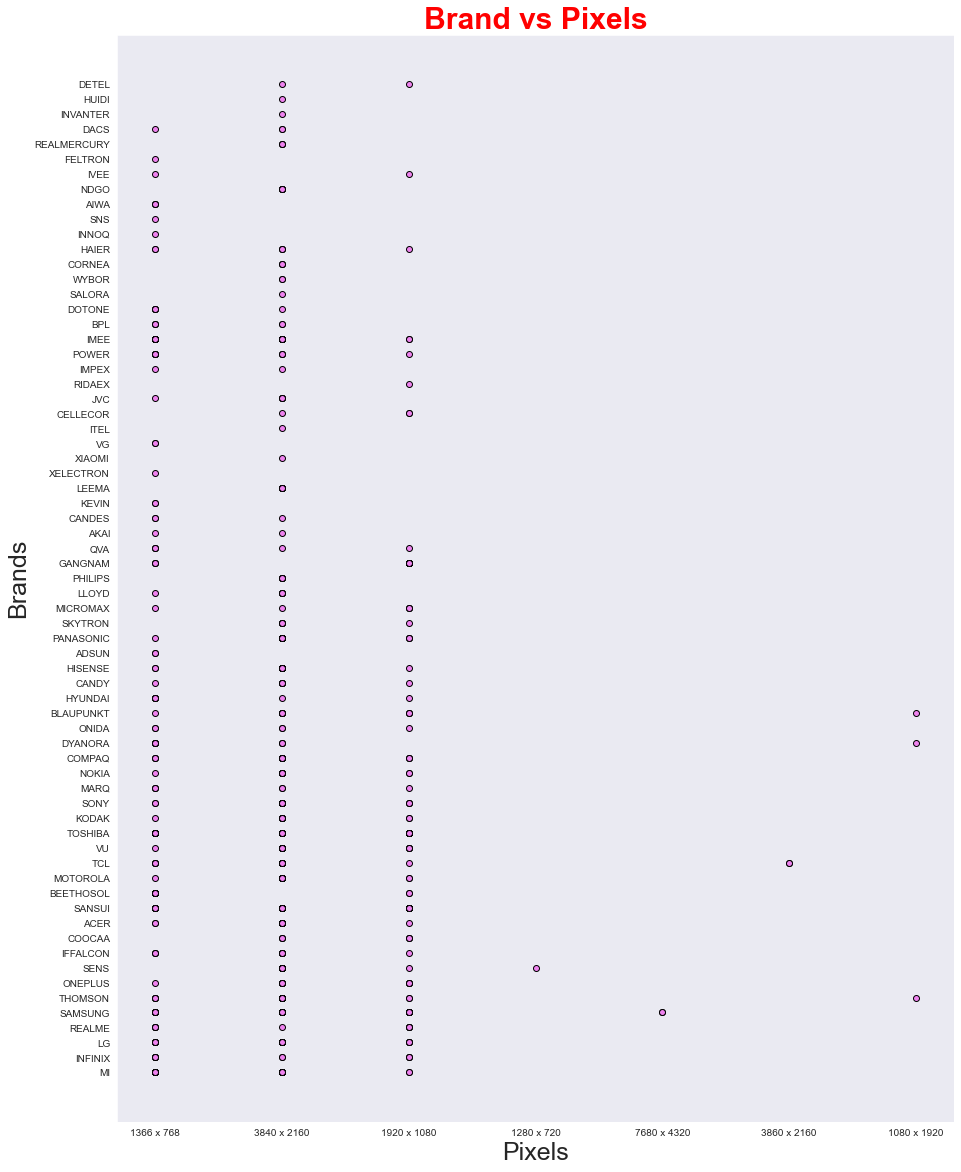

In [72]:
plt.figure(figsize=(15, 20))
plt.scatter(TV['Pixels'],TV['Brand'],color='violet',ec='black')
plt.xlabel('Pixels',fontsize=25)
plt.ylabel('Brands',fontsize=25)
plt.title('Brand vs Pixels',fontsize=30,fontweight='bold',color='red')
plt.show()

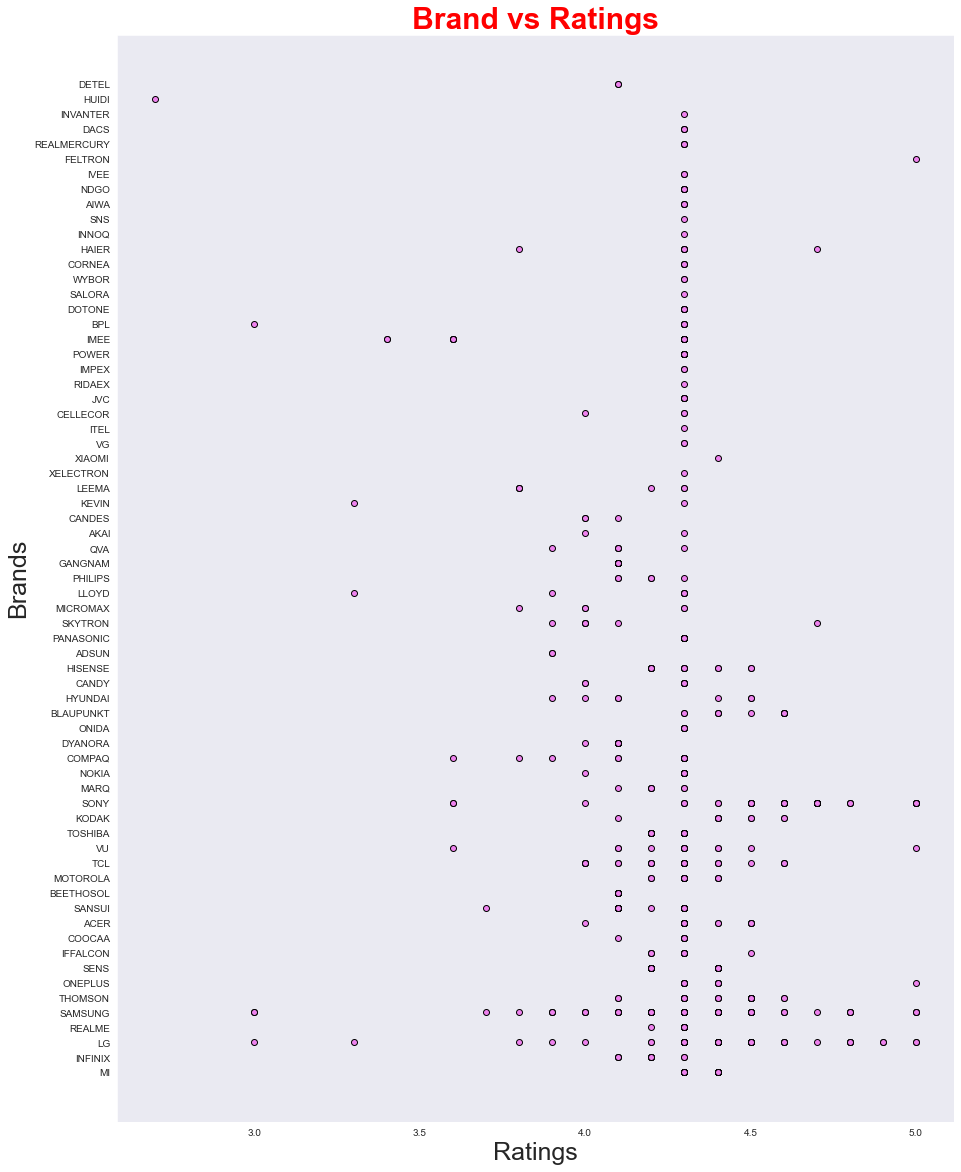

In [73]:
plt.figure(figsize=(15, 20))
plt.scatter(TV['Ratings'],TV['Brand'],color='violet',ec='black')
plt.xlabel('Ratings',fontsize=25)
plt.ylabel('Brands',fontsize=25)
plt.title('Brand vs Ratings',fontsize=30,fontweight='bold',color='red')
plt.show()

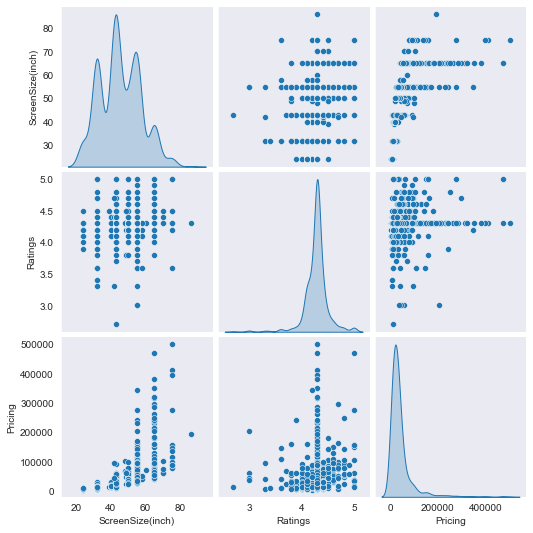

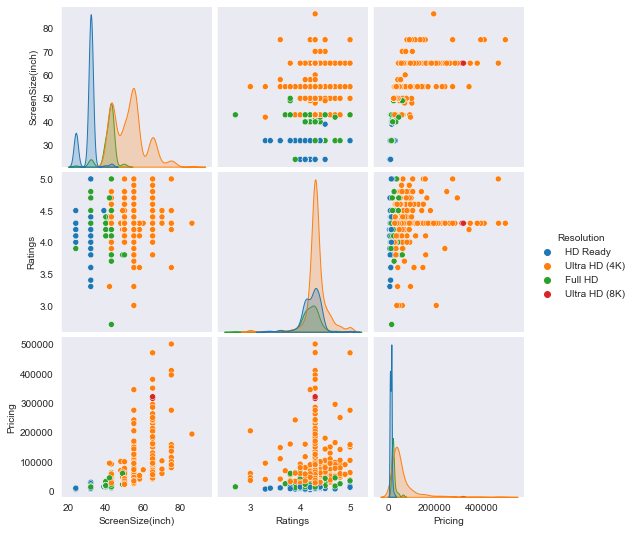

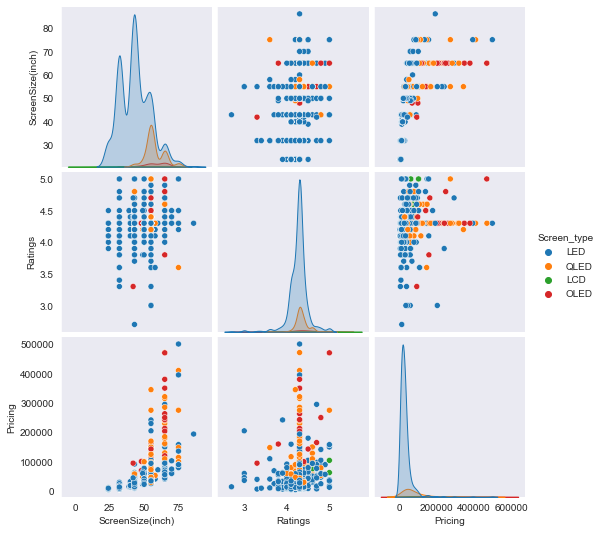

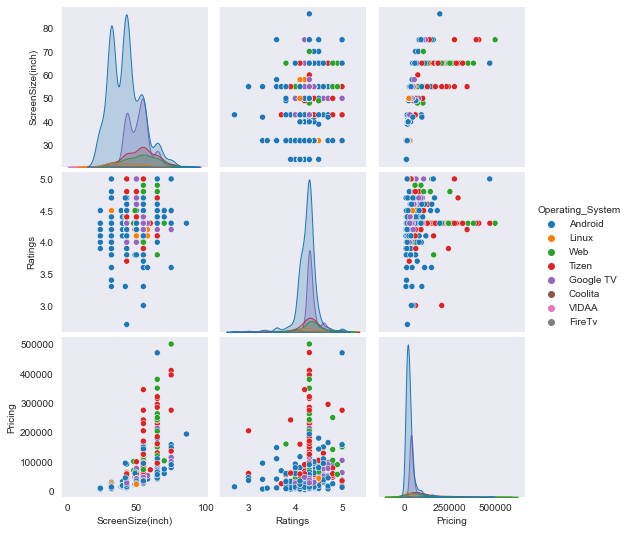

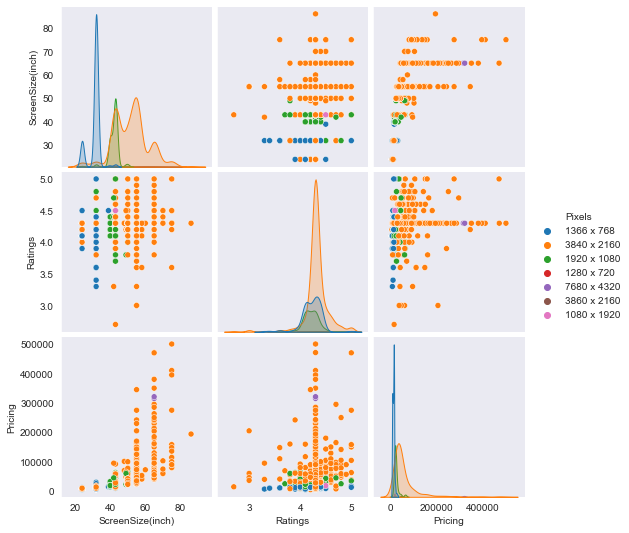

In [74]:
sns.set_style('dark')
sns.pairplot(TV,diag_kind='kde')
plt.show()

sns.set_style('dark')
sns.pairplot(TV,hue='Resolution')
plt.show()

sns.set_style('dark')
sns.pairplot(TV,hue='Screen_type')
plt.show()

sns.set_style('dark')
sns.pairplot(TV,hue='Operating_System')
plt.show()

sns.set_style('dark')
sns.pairplot(TV,hue='Pixels')
plt.show()

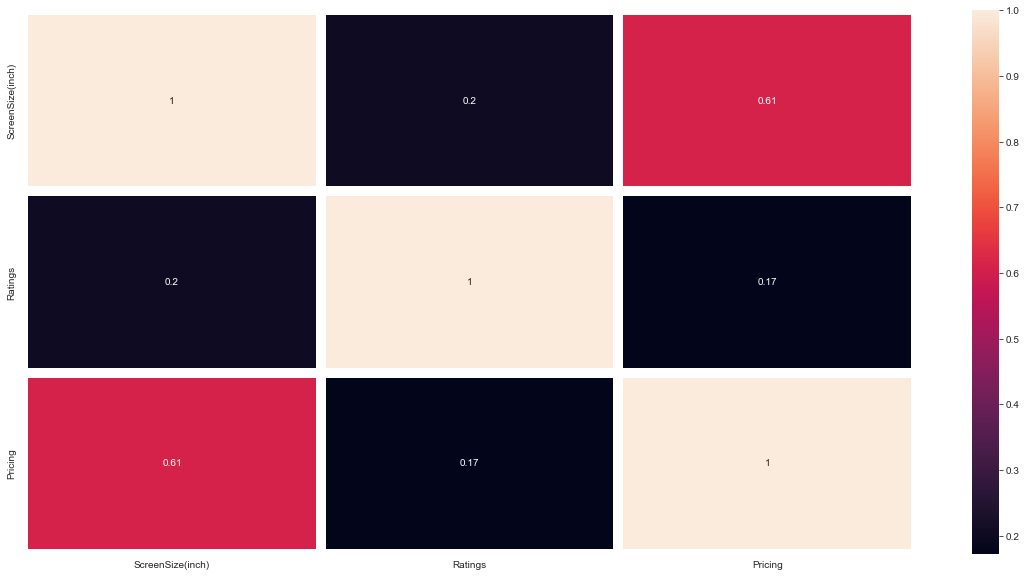

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(TV.corr(),linewidth=10,annot=True)
plt.show()

In [76]:
TV

,Brand,ScreenSize(inch),Screen_type,Resolution,Operating_System,Ratings,Pricing,Pixels
0,MI,32.0,LED,HD Ready,Android,4.4,13999.0,1366 x 768
1,MI,43.0,LED,Ultra HD (4K),Android,4.3,28999.0,3840 x 2160
2,INFINIX,32.0,LED,HD Ready,Linux,4.2,8199.0,1366 x 768
3,LG,32.0,LED,HD Ready,Web,4.4,13990.0,1366 x 768
4,REALME,32.0,LED,HD Ready,Android,4.3,11999.0,1366 x 768
...,...,...,...,...,...,...,...,...
979,DETEL,43.0,LED,Full HD,Android,4.1,23147.0,1920 x 1080
980,TOSHIBA,55.0,LED,Ultra HD (4K),Google TV,4.3,36999.0,3840 x 2160
981,TOSHIBA,43.0,LED,Ultra HD (4K),Google TV,4.3,27999.0,3840 x 2160
982,DETEL,55.0,LED,Ultra HD (4K),Android,4.1,34671.0,3840 x 2160


In [77]:
tvhigh=TV[(TV['ScreenSize(inch)']>=65.0) & (TV['Ratings']>=4.0) & (TV['Screen_type'].isin(['OLED','QLED'])) & (TV['Resolution'].isin(['Ultra HD (4K)','Ultra HD (8K)']))]
tvhigh

,Brand,ScreenSize(inch),Screen_type,Resolution,Operating_System,Ratings,Pricing,Pixels
115,MOTOROLA,65.0,QLED,Ultra HD (4K),Google TV,4.2,49999.0,3840 x 2160
213,THOMSON,65.0,QLED,Ultra HD (4K),Google TV,4.6,56999.0,3840 x 2160
233,SANSUI,65.0,QLED,Ultra HD (4K),Google TV,4.3,56990.0,3840 x 2160
295,IFFALCON,65.0,QLED,Ultra HD (4K),Android,4.3,56999.0,3840 x 2160
305,KODAK,65.0,QLED,Ultra HD (4K),Google TV,4.6,53999.0,3840 x 2160
332,ONEPLUS,65.0,QLED,Ultra HD (4K),Google TV,4.3,99999.0,3840 x 2160
333,VU,65.0,QLED,Ultra HD (4K),Android,4.5,88950.0,3840 x 2160
337,LG,65.0,OLED,Ultra HD (4K),Web,4.3,262999.0,3840 x 2160
353,SAMSUNG,75.0,QLED,Ultra HD (4K),Tizen,4.3,409990.0,3840 x 2160
354,LG,65.0,OLED,Ultra HD (4K),Web,4.3,349999.0,3840 x 2160


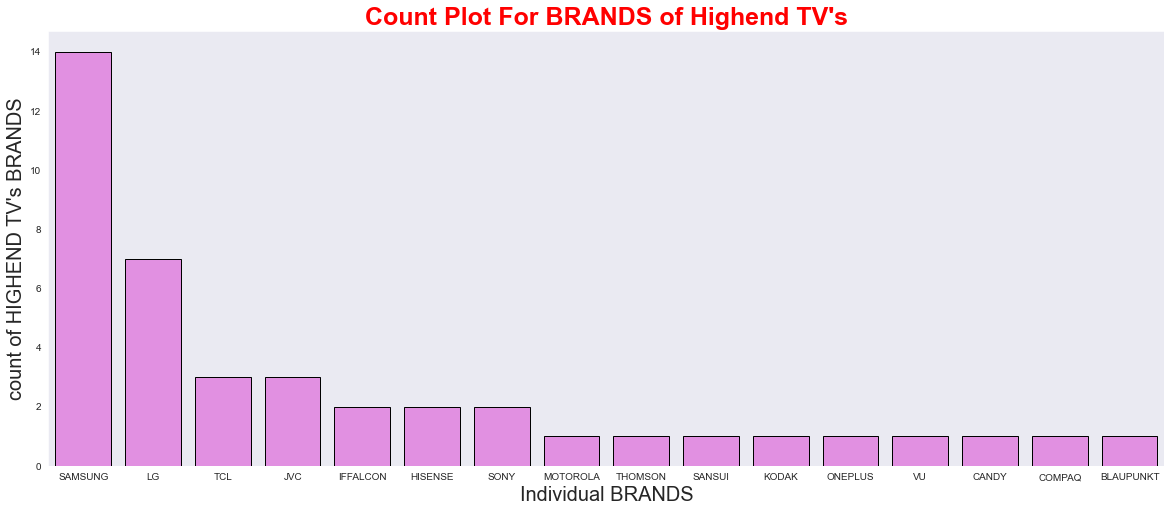

In [78]:
plt.figure(figsize=(20,8))
sns.set_style('dark')
sns.countplot(x=tvhigh.Brand,order=tvhigh.Brand.value_counts().index,color='violet',ec='black')
plt.xlabel("Individual BRANDS",fontsize=20)
plt.ylabel("count of HIGHEND TV's BRANDS",fontsize=20)
plt.title("Count Plot For BRANDS of Highend TV's",fontsize=25,fontweight='bold',color='red')
plt.show()

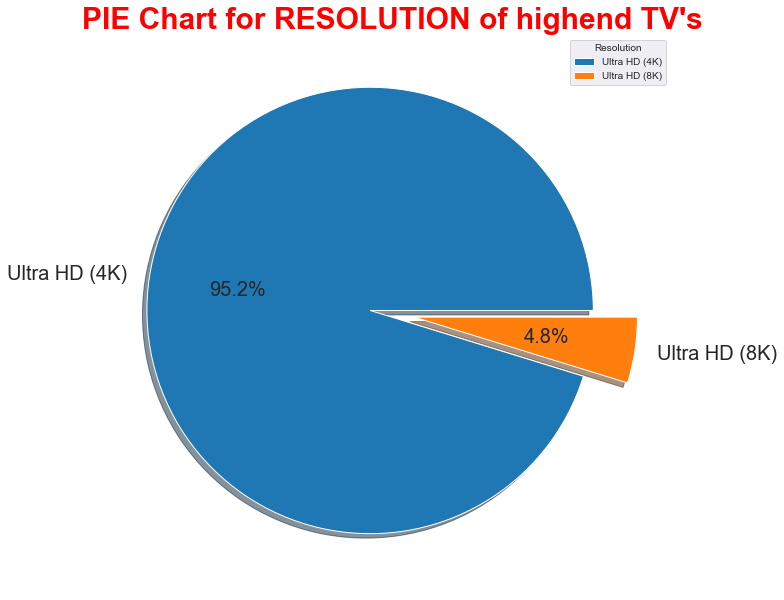

In [79]:
plt.figure(figsize=(10,15))
sns.set_style('dark')
plt.pie(x=tvhigh.Resolution.value_counts().values,labels=tvhigh.Resolution.value_counts().index,explode=(0.1,0.1),shadow=True,autopct='%.1f%%',textprops={'fontsize':20})
plt.title("PIE Chart for RESOLUTION of highend TV's",fontsize=30,fontweight='bold',color='red')
plt.legend(title='Resolution',loc=1)
plt.show()

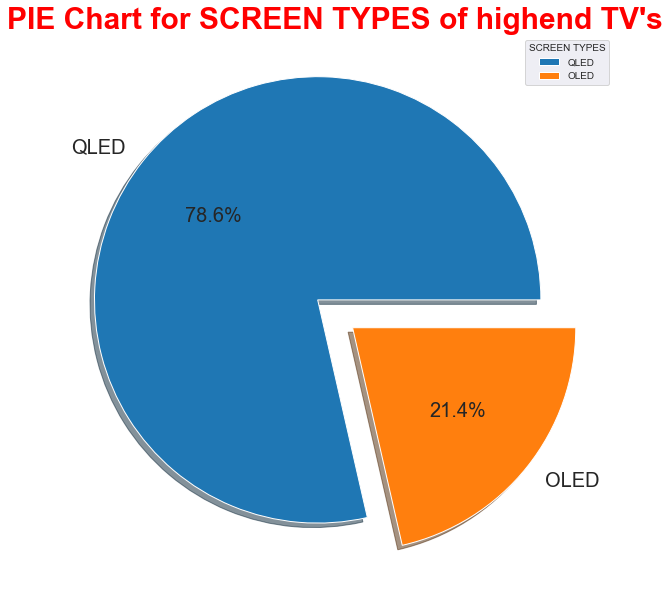

In [80]:
plt.figure(figsize=(10,15))
sns.set_style('dark')
plt.pie(x=tvhigh.Screen_type.value_counts().values,labels=tvhigh.Screen_type.value_counts().index,explode=(0.1,0.1),autopct='%.1f%%',shadow=True,textprops={'fontsize':20})
plt.title("PIE Chart for SCREEN TYPES of highend TV's",fontsize=30,fontweight='bold',color='red')
plt.legend(title='SCREEN TYPES',loc=1)
plt.show()

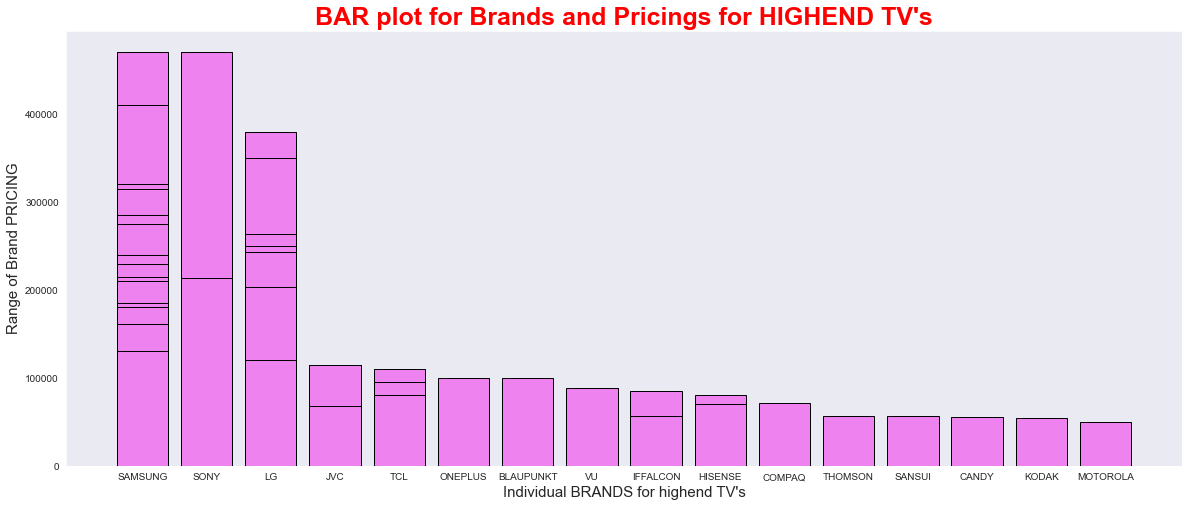

In [81]:
plt.figure(figsize=(20,8))
sns.set_style('dark')
tvhigh_pricesort=tvhigh.sort_values('Pricing',ascending=False)
plt.bar(tvhigh_pricesort.Brand,tvhigh_pricesort.Pricing,color='violet',ec='black')
plt.xlabel("Individual BRANDS for highend TV's",fontsize=15)
plt.ylabel('Range of Brand PRICING',fontsize=15)
plt.title("BAR plot for Brands and Pricings for HIGHEND TV's",fontsize=25,fontweight='bold',color='red')
plt.show()

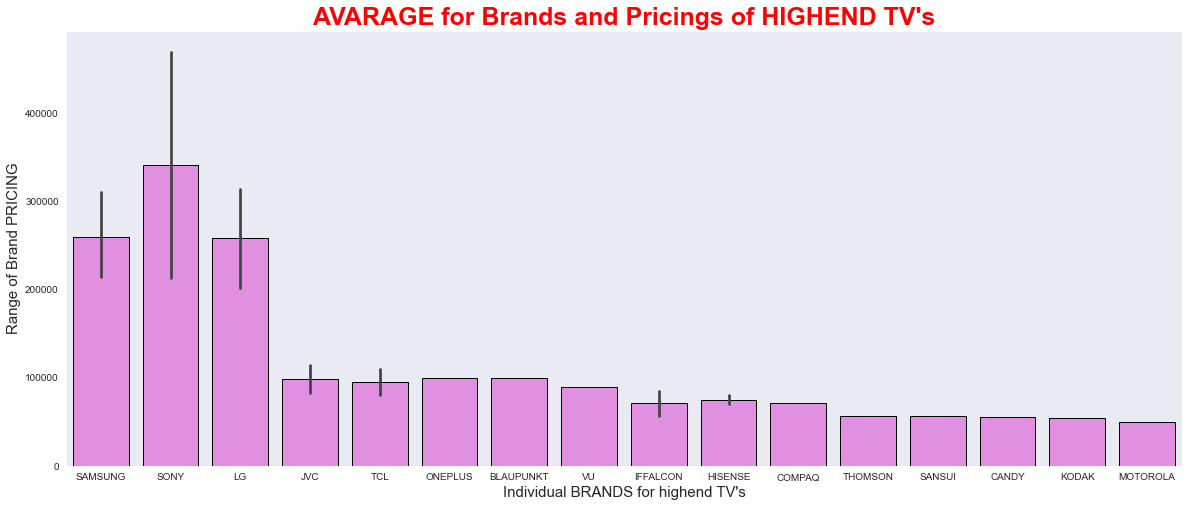

In [82]:
plt.figure(figsize=(20,8))
sns.set_style('dark')
tvhigh_pricesort=tvhigh.sort_values('Pricing',ascending=False)
sns.barplot(tvhigh_pricesort.Brand,tvhigh_pricesort.Pricing,color='violet',ec='black')
plt.xlabel("Individual BRANDS for highend TV's",fontsize=15)
plt.ylabel('Range of Brand PRICING',fontsize=15)
plt.title("AVARAGE for Brands and Pricings of HIGHEND TV's",fontsize=25,fontweight='bold',color='red')
plt.show()

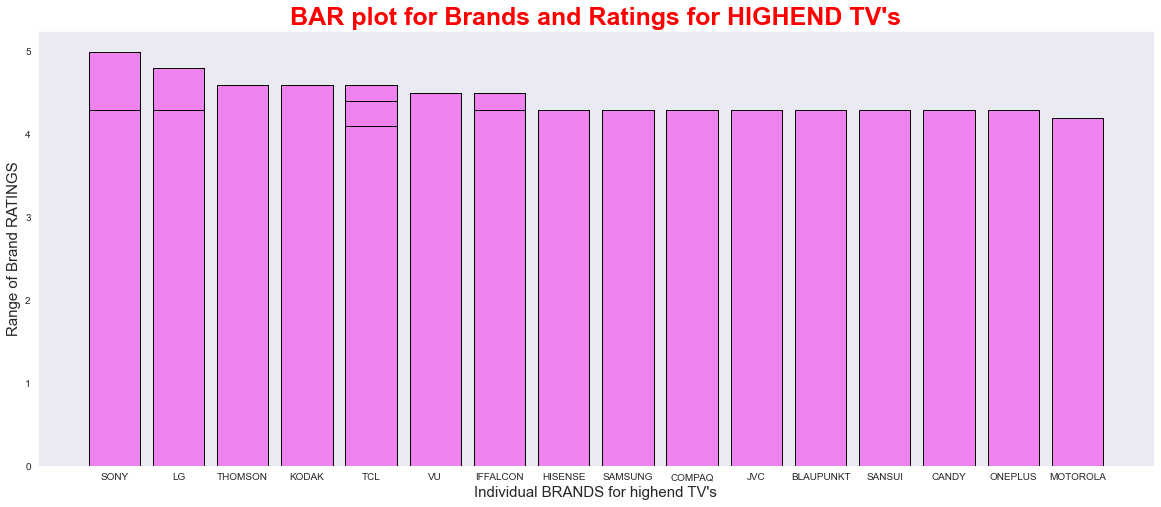

In [83]:
plt.figure(figsize=(20,8))
sns.set_style('dark')
tvhigh_pricesort=tvhigh.sort_values('Ratings',ascending=False)
plt.bar(tvhigh_pricesort.Brand,tvhigh_pricesort.Ratings,color='violet',ec='black')
plt.xlabel("Individual BRANDS for highend TV's",fontsize=15)
plt.ylabel('Range of Brand RATINGS',fontsize=15)
plt.title("BAR plot for Brands and Ratings for HIGHEND TV's",fontsize=25,fontweight='bold',color='red')
plt.show()

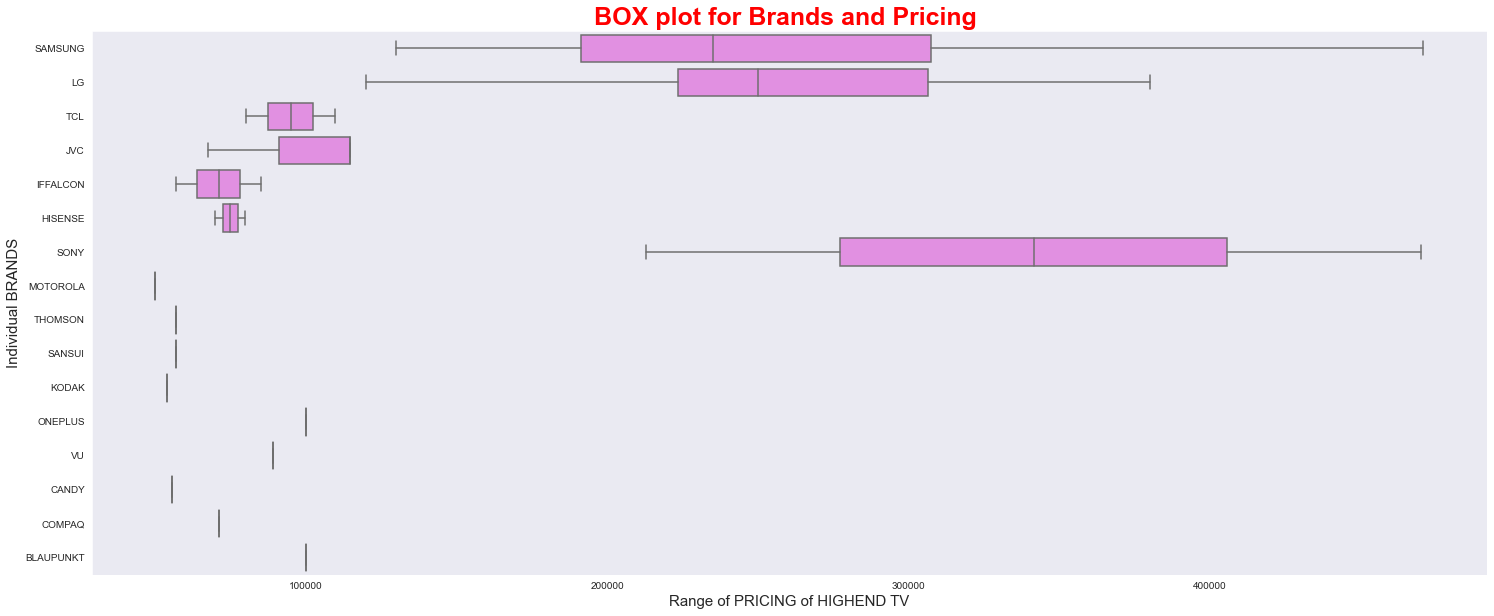

In [84]:
plt.figure(figsize=(25,10))
sns.set_style('dark')
sns.boxplot(x='Pricing',y='Brand',data=tvhigh,order=tvhigh.Brand.value_counts().index,color='violet')
plt.ylabel('Individual BRANDS',fontsize=15)
plt.xlabel('Range of PRICING of HIGHEND TV',fontsize=15)
plt.title("BOX plot for Brands and Pricing ",fontsize=25,fontweight='bold',color='red')
plt.show()

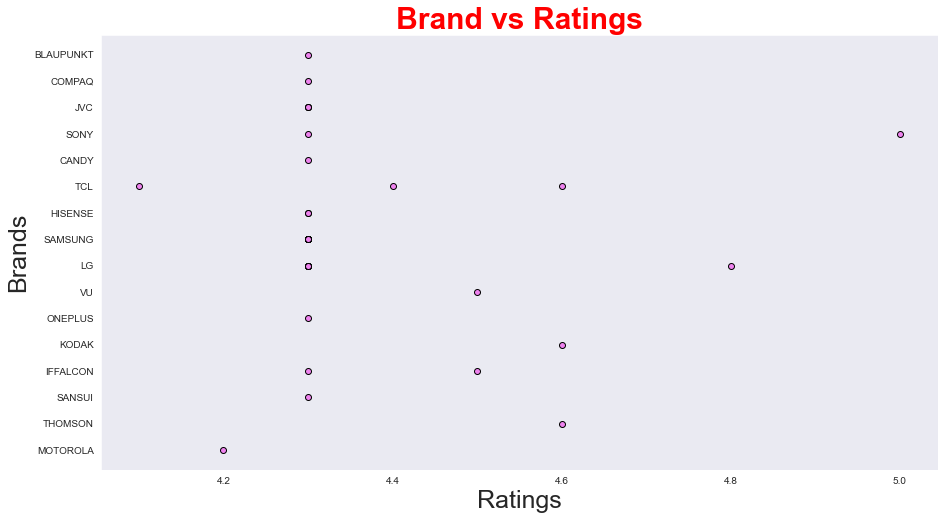

In [85]:
plt.figure(figsize=(15, 8))
plt.scatter(tvhigh['Ratings'],tvhigh['Brand'],color='violet',ec='black')
plt.xlabel('Ratings',fontsize=25)
plt.ylabel('Brands',fontsize=25)
plt.title('Brand vs Ratings',fontsize=30,fontweight='bold',color='red')
plt.show()

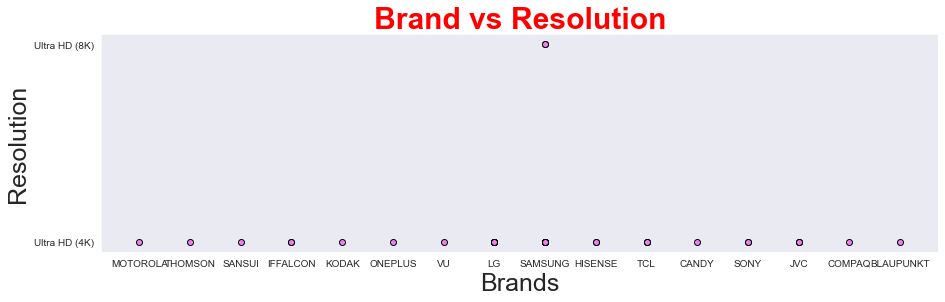

In [86]:
plt.figure(figsize=(15, 4))
plt.scatter(tvhigh['Brand'],tvhigh['Resolution'],color='violet',ec='black')
plt.xlabel('Brands',fontsize=25)
plt.ylabel('Resolution',fontsize=25)
plt.title('Brand vs Resolution',fontsize=30,fontweight='bold',color='red')
plt.show()

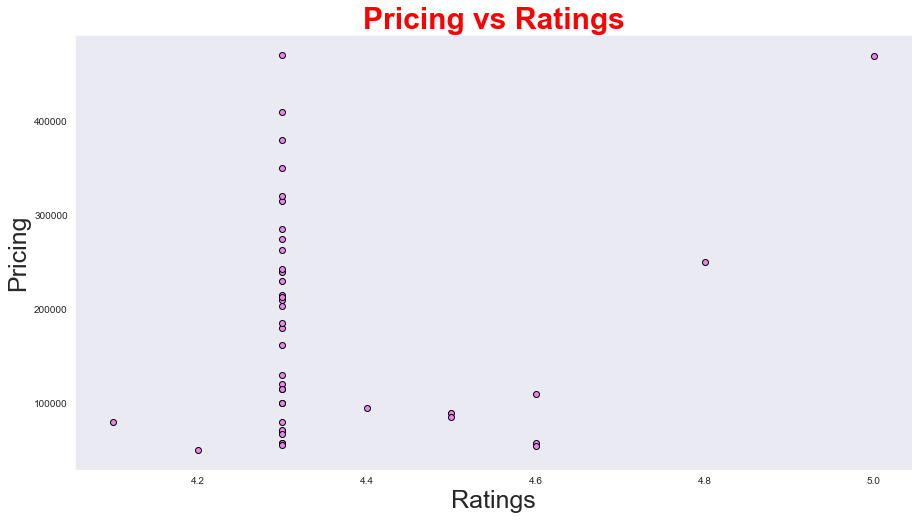

In [87]:
plt.figure(figsize=(15, 8))
plt.scatter(tvhigh['Ratings'],tvhigh['Pricing'],color='violet',ec='black')
plt.xlabel('Ratings',fontsize=25)
plt.ylabel('Pricing',fontsize=25)
plt.title('Pricing vs Ratings',fontsize=30,fontweight='bold',color='red')
plt.show()

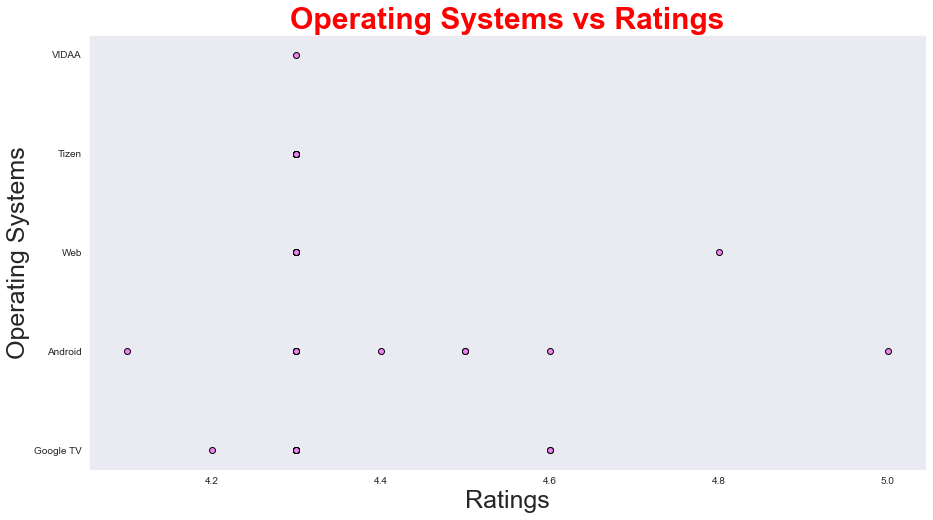

In [88]:
plt.figure(figsize=(15, 8))
plt.scatter(tvhigh['Ratings'],tvhigh['Operating_System'],color='violet',ec='black')
plt.xlabel('Ratings',fontsize=25)
plt.ylabel('Operating Systems',fontsize=25)
plt.title('Operating Systems vs Ratings',fontsize=30,fontweight='bold',color='red')
plt.show()

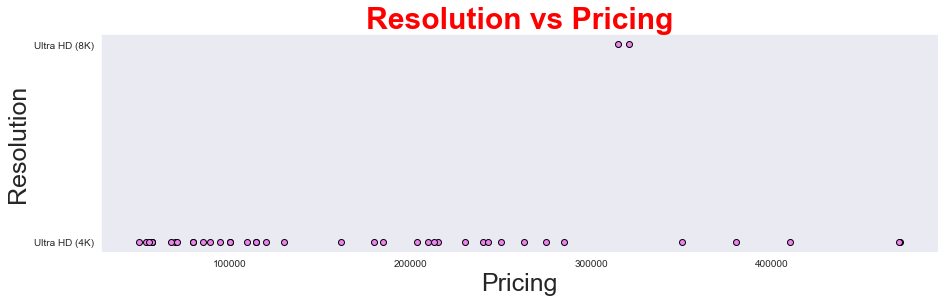

In [89]:
plt.figure(figsize=(15, 4))
plt.scatter(tvhigh['Pricing'],tvhigh['Resolution'],color='violet',ec='black')
plt.xlabel('Pricing',fontsize=25)
plt.ylabel('Resolution',fontsize=25)
plt.title('Resolution vs Pricing',fontsize=30,fontweight='bold',color='red')
plt.show()

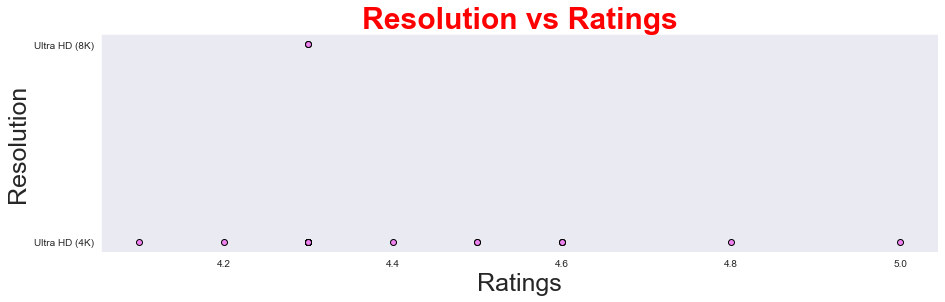

In [90]:
plt.figure(figsize=(15, 4))
plt.scatter(tvhigh['Ratings'],tvhigh['Resolution'],color='violet',ec='black')
plt.xlabel('Ratings',fontsize=25)
plt.ylabel('Resolution',fontsize=25)
plt.title('Resolution vs Ratings',fontsize=30,fontweight='bold',color='red')
plt.show()

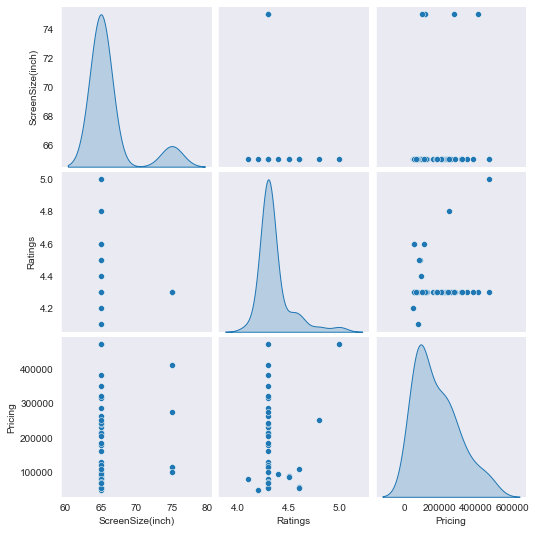

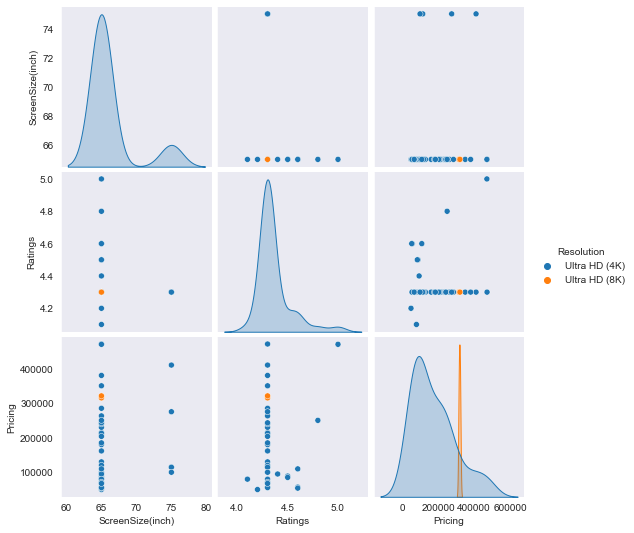

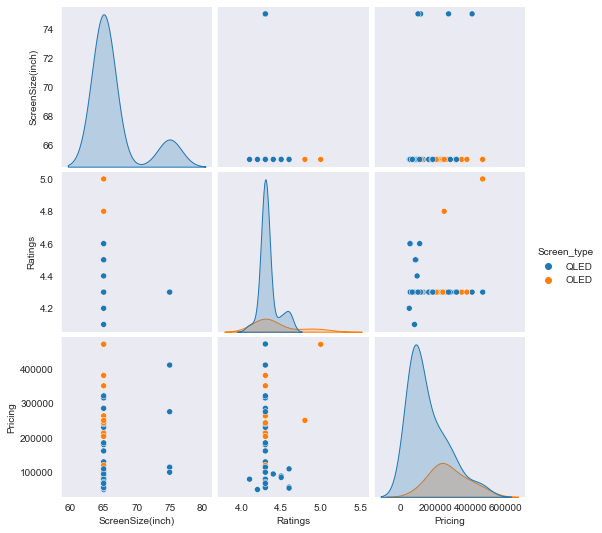

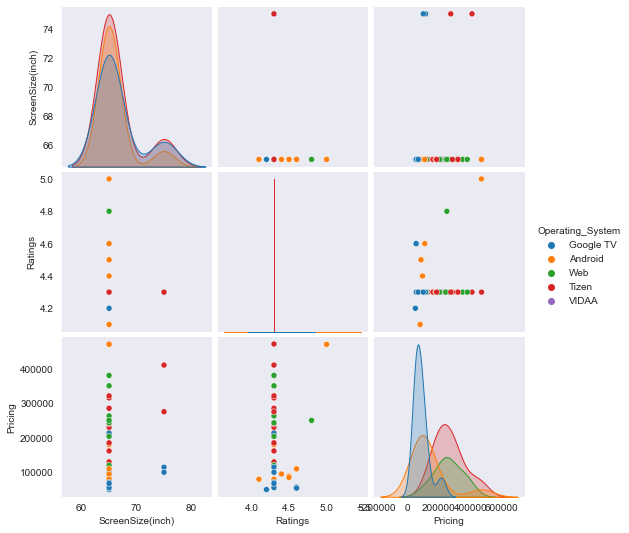

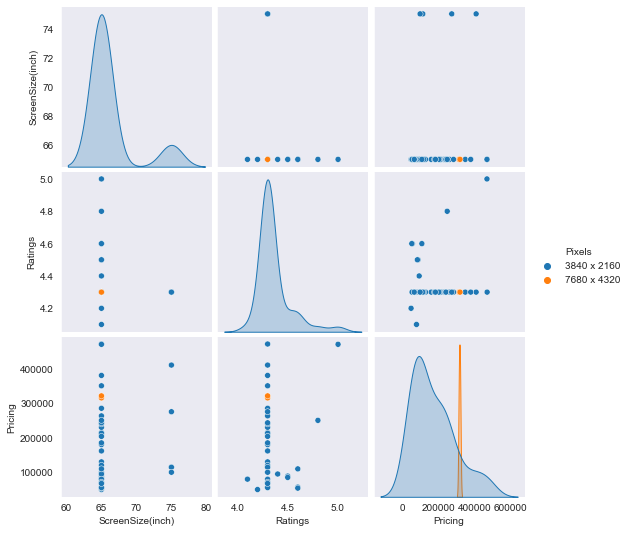

In [91]:
sns.set_style('dark')
sns.pairplot(tvhigh,diag_kind='kde')
plt.show()

sns.set_style('dark')
sns.pairplot(tvhigh,hue='Resolution')
plt.show()

sns.set_style('dark')
sns.pairplot(tvhigh,hue='Screen_type')
plt.show()

sns.set_style('dark')
sns.pairplot(tvhigh,hue='Operating_System')
plt.show()

sns.set_style('dark')
sns.pairplot(tvhigh,hue='Pixels')
plt.show()

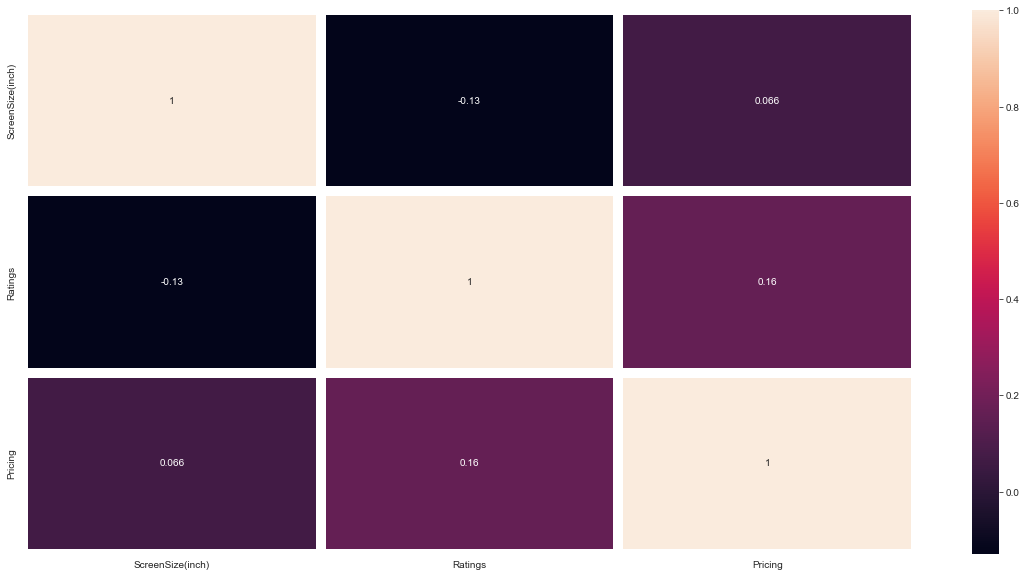

In [92]:
plt.figure(figsize=(20, 10))
sns.set_style('dark')
sns.heatmap(tvhigh.corr(),linewidth=10,annot=True)
plt.show()

In [93]:
TV

,Brand,ScreenSize(inch),Screen_type,Resolution,Operating_System,Ratings,Pricing,Pixels
0,MI,32.0,LED,HD Ready,Android,4.4,13999.0,1366 x 768
1,MI,43.0,LED,Ultra HD (4K),Android,4.3,28999.0,3840 x 2160
2,INFINIX,32.0,LED,HD Ready,Linux,4.2,8199.0,1366 x 768
3,LG,32.0,LED,HD Ready,Web,4.4,13990.0,1366 x 768
4,REALME,32.0,LED,HD Ready,Android,4.3,11999.0,1366 x 768
...,...,...,...,...,...,...,...,...
979,DETEL,43.0,LED,Full HD,Android,4.1,23147.0,1920 x 1080
980,TOSHIBA,55.0,LED,Ultra HD (4K),Google TV,4.3,36999.0,3840 x 2160
981,TOSHIBA,43.0,LED,Ultra HD (4K),Google TV,4.3,27999.0,3840 x 2160
982,DETEL,55.0,LED,Ultra HD (4K),Android,4.1,34671.0,3840 x 2160


In [95]:
TV[(TV['ScreenSize(inch)']>=40) & (TV['ScreenSize(inch)']<=50) & (TV['Resolution']=='Ultra HD (4K)') & (TV['Screen_type'].isin(['OLED','QLED'])) & (TV['Ratings']>=4.0)]

,Brand,ScreenSize(inch),Screen_type,Resolution,Operating_System,Ratings,Pricing,Pixels
124,TCL,43.0,QLED,Ultra HD (4K),Google TV,4.6,38990.0,3840 x 2160
138,THOMSON,50.0,QLED,Ultra HD (4K),Google TV,4.6,32999.0,3840 x 2160
144,BLAUPUNKT,50.0,QLED,Ultra HD (4K),Google TV,4.6,34999.0,3840 x 2160
173,SAMSUNG,50.0,QLED,Ultra HD (4K),Tizen,4.2,69990.0,3840 x 2160
186,KODAK,50.0,QLED,Ultra HD (4K),Google TV,4.6,30999.0,3840 x 2160
216,TCL,50.0,QLED,Ultra HD (4K),Google TV,4.2,45990.0,3840 x 2160
236,NOKIA,50.0,QLED,Ultra HD (4K),Android,4.3,30999.0,3840 x 2160
245,TCL,50.0,QLED,Ultra HD (4K),Google TV,4.6,46990.0,3840 x 2160
399,SAMSUNG,43.0,QLED,Ultra HD (4K),Tizen,4.2,51990.0,3840 x 2160
418,TCL,50.0,QLED,Ultra HD (4K),Android,4.3,47759.0,3840 x 2160
